# 参数设定

In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
import os
import pickle
import subprocess
import numpy as np
import pandas as pd
import altair as alt
alt.data_transformers.enable('default', max_rows = None) # 避免警告数据量超过5000
alt.renderers.enable('notebook')
names=locals()

# 基本参数
direction = 'South' # North、South
Fs = 204.8 # 采样频率
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')

# 数据和图片保存位置
data_path = 'E:/【论文】/【小论文】/航博/航博数据/Acceleration/%s/'%direction
picture_path0 = 'E:/【论文】/【小论文】/航博/Pictures/Acceleration(%s)/Acc/'%direction
if not os.path.exists(picture_path0): os.makedirs(picture_path0)

# Function-用inkscape来转换格式
def convertSVGtoEMF(figname): 
    figname_1 = figname.replace('.svg', '.emf')
    cmd = 'inkscape -z %s -M %s' % (figname, figname_1)
    result = [] # 储存cmd中结果
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    for line in process.stdout:
        result.append(line)
    errcode = process.returncode 
    for line in result:
        print(line)
    if errcode is not None:
        raise Exception('cmd %s failed, see above for details', cmd)

# Function-判断变量是否已经加载
def if_var_exists(var):
    var_exists = var in locals() or var in globals()
    return var_exists

# 加载acc并启动Matlab

In [2]:
# 加载acc 已经预留了10分钟的值，到 5:10
if not if_var_exists('acc'):
    with open(data_path+'acc_zero.pkl','rb') as f:
        acc = pickle.load(f)

# 如果已经存在matlab会话，就不必新开一个
import matlab.engine
engine_list = matlab.engine.find_matlab()
if len(engine_list):
    try:
        engine = matlab.engine.connect_matlab(engine_list[-1])
    except:
        engine = matlab.engine.start_matlab()
else:
    engine = matlab.engine.start_matlab()

# 设置微信提醒

In [ ]:
import itchat
# 通过如下命令登陆，即使程序关闭，一定时间内重新开启也可以不用重新扫码。
itchat.auto_login(hotReload=True)
# 生成好友ID和昵称对应字典
friends = itchat.get_friends()
friends = {x.get('NickName'):x.get('UserName') for x in friends}
friends['我自己'] = '@05db26a1973c40967c4ab4fe1c64752e42966b1aaeb530647af7ea5533dc2842'

In [ ]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/HTTPS', width=1000, height=450)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('9SA7FaKxZVI', width=800, height=300)

# 加速度（Original）

## 单画

In [ ]:
for position in [1,2,3,4,5]:
    interval = 1
    title_name = 'Original (Position%d)' % position
    Original = pd.DataFrame([])
    Original['Mean'] = acc[position-1].resample('%fT'%interval).mean()
    Original['Max'] = acc[position-1].resample('%fT'%interval).max()
    Original['Min'] = acc[position-1].resample('%fT'%interval).min()
    Original = Original[start_time:end_time].reset_index().melt('index', var_name='Position%d'%position, value_name='Original')

    # 作图
    chart = (alt
             .Chart(Original, title='')
             .mark_line(strokeWidth=2.5)
             .encode(alt.X('index:T', title=None, axis=alt.Axis(format='%0H:%0M')), # tickCount=15
                     alt.Y('Original:Q', title='Acceleration (m/s²)'),
                     alt.Color('Position%d:N'%position, legend=alt.Legend(
                         title=None, orient='none', legendX=-20, legendY=25,
                         values=['Position%d(%s):'%(position,direction),'Max','Mean','Min'], direction='horizontal')))
             .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
             .configure_title(font='Times New Roman', fontSize=30)
             .configure_legend(titleFont='Times New Roman', titleFontSize=24, titleFontWeight='bold',
                               labelFont='Times New Roman', labelFontSize=24, labelFontWeight='bold',
                               symbolStrokeWidth=4, symbolSize=300, rowPadding=15, labelLimit=400, symbolOffset=15)
             .properties(width=1300)
    #          .interactive(bind_y = False) # 交互性设置
             )
    chart.display()
    picture_path1 = picture_path0 + title_name + '.png'
    # chart.save(picture_path1, scale_factor=10)

## 合画

In [ ]:
names = locals()
for position in [1,2,3,4,5]:
    interval = 1
    Original = pd.DataFrame([])
    Original['Mean'] = acc[position-1].resample('%fT'%interval).mean()
    Original['Max'] = acc[position-1].resample('%fT'%interval).max()
    Original['Min'] = acc[position-1].resample('%fT'%interval).min()
    Original = Original[start_time:end_time].reset_index().melt('index', var_name='Position%d'%position, value_name='Original')

    # 作图
    names['chart%d'%position] = (alt
             .Chart(Original, title='')
             .mark_line(strokeWidth=1.5, strokeOpacity=0.7)
             .encode(alt.X('index:T', title=None, axis=alt.Axis(format='%0H:%0M')), # tickCount=15
                     alt.Y('Original:Q', title='Acceleration (m/s²)'),
                     alt.Color('Position%d:N'%position, legend=alt.Legend(
                         orient='none', legendX=-20, legendY=25,
                         values=['Position1~5:','Max','Mean','Min'], direction='horizontal')))
              )
                            
chart = ((chart1+chart2+chart3+chart4+chart5)                          
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_legend(title=None, labelFont='Times New Roman',labelFontSize=24, labelFontWeight='bold',
                           orient='top-left', symbolStrokeWidth=4, symbolSize=300,
                           rowPadding=15, labelLimit=400, symbolOffset=15)
         .properties(width=1300, height=330)
         # .interactive(bind_x = False) # 交互性设置
         )
chart.display()
title_name = 'Original (Position1~5)'
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

# 加速度（RMS）

In [ ]:
# 计算
title_name = 'Wind-induced Response RMS'
if not if_var_exists('interval'): interval=1
if not if_var_exists('position'): position=1
RMS = acc.resample('%fT'%interval).std()
RMS.columns = ['Position1','Position2','Position3','Position4','Position5']
# RMS = RMS['Position%d'%position]
RMS = RMS[start_time:end_time].reset_index().melt('index', var_name='Position', value_name='RMS')

# 作图
chart = (alt
         .Chart(RMS, title='')
         .mark_line(strokeWidth=2)
         .encode(alt.X('index:T', title=None, axis=alt.Axis(format='%0H:%0M')), # tickCount=15
                 alt.Y('RMS:Q', title='RMS Acceleration (m/s²)'),
                 alt.Color('Position:N',
                           legend=alt.Legend(title=None, direction='horizontal')))
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_legend(title=None, labelFont='Times New Roman',labelFontSize=24, labelFontWeight='bold',
                           orient='top-left', symbolStrokeWidth=4, symbolSize=300,
                           rowPadding=15, labelLimit=400, symbolOffset=15)
         .properties(width=1300)
         #.interactive(bind_y = False) # 交互性设置
         )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

# 加速度（kurtosis）

## Histogram

In [ ]:
# 选定数据
position = 1 # 测点位置
title_name = 'Wind-induced Response Histogram'
acc0 = acc[position-1][start_time:end_time]
binWidth = float(0.001) # 条形图宽度
if_sigma = float(0) # 是否剔除异常数据
if_log = float(0) # 是否对绝对值取对数
if_draw = float(0) # 是否出图
engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
[center,frequency,sigma,x1,y1] = engine.GaussFit_functin_py(
    matlab.double(acc0.tolist()),binWidth,if_sigma,if_log,if_draw,nargout=5)

Histogram = pd.DataFrame([]); GaussianFit = pd.DataFrame([])
Histogram['center'] = list(center[0])
Histogram['frequency'] = list(frequency[0])
Histogram['name'] = 'Frequency Distribution'
GaussianFit['x1'] = list(x1[0])
GaussianFit['y1'] = list(y1[0])
GaussianFit['name'] = 'Gaussian Distribution'

chart1 = (alt
          .Chart(Histogram)
          .mark_bar(fill='#4c78a8', fillOpacity=0.9, stroke='#7f7f7f', binSpacing=2, clip=True)
          .encode(alt.X('center:Q', title='Wind-induced Response (m/s²)', bin=alt.Bin(step=binWidth), axis=alt.Axis(format='.5f'),
                        scale=alt.Scale(domain=(-3*sigma,3*sigma))),
                  alt.Y('frequency:Q', title='Frequency', axis=alt.Axis(orient='left')),
                  alt.Color('name', legend=alt.Legend(title=None), scale=alt.Scale(range=('#4c77a8','red'))))
         )
chart2 = (alt
          .Chart(GaussianFit)
          .mark_line(strokeWidth=2.5, clip=True)
          .encode(alt.X('x1:Q', scale=alt.Scale(domain=(-3*sigma,3*sigma))),
                  alt.Y('y1:Q', title='Gaussian Probability Density', axis=alt.Axis(orient='right')),
                  alt.Color('name', legend=alt.Legend(title=None)))
         )
chart = ((chart1 + chart2)
         .configure_axis(titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=600,height=350)
         .configure_legend(orient='top-left', rowPadding=15, labelFont='Times New Roman',labelFontSize=17, labelFontWeight='bold', labelLimit=400)
         .configure_view(stroke='#000', strokeWidth=0.3) # 黑色外边框，需设置grid=False才能看到
         #.interactive(bind_x = False) # 交互性设置
        )
chart.display()
# picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## Skewness（偏度系数）

In [ ]:
# 计算
title_name = 'Variation of Skewness with Time'
from scipy import stats
if not if_var_exists('interval'): interval=1
if not if_var_exists('position'): position=2
Skewness = acc.resample('%fT'%interval).apply(lambda x : stats.skew(x))
Skewness.columns = ['Position1','Position2','Position3','Position4','Position5']
Skewness = Skewness['Position%d'%position]
Skewness = Skewness[start_time:end_time].reset_index().melt('index', var_name='Position', value_name='Skewness')

# 绘制3个偏度系数 时程
chart1 = (alt.Chart(data=Skewness, title=title_name)
         .mark_point(strokeWidth=5, size=10, clip=True)
         .encode(alt.X('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.Y('Skewness:Q', title='Skewness', scale=alt.Scale(zero=False)),
                 alt.Color('Position:N', legend=alt.Legend(
                     title=None, orient='top-left', rowPadding=7, titlePadding=10,
                     labelFont='Times New Roman',labelFontSize=18, labelLimit=400)),
                 alt.Shape('Position:N', legend=alt.Legend(title=None)))
        )
hline = alt.Chart().mark_rule(strokeDash=[12,5], strokeWidth=2).encode(y='a:Q').transform_calculate(a="0")
chart = (alt
         .layer(hline, chart1, data=Skewness, title=title_name)
         .configure_axis(titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=1300)
         #.interactive(bind_x = False) # 交互性设置
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## Kurtosis（峰度系数）

In [ ]:
# 计算
title_name = 'Variation of Kurtosis with Time'
from scipy import stats
if not if_var_exists('interval'): interval=1
if not if_var_exists('position'): position=2
Kurtosis = acc.resample('%fT'%interval).apply(lambda x : stats.kurtosis(x,fisher=False))
Kurtosis.columns = ['Position1','Position2','Position3','Position4','Position5']
Kurtosis = Kurtosis['Position%d'%position]
Kurtosis = Kurtosis[start_time:end_time].reset_index().melt('index', var_name='Position', value_name='Kurtosis')

# 绘制3个偏度系数 时程
chart1 = (alt.Chart(data=Kurtosis, title=title_name)
         .mark_point(strokeWidth=5, size=10, clip=True)
         .encode(alt.X('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.Y('Kurtosis:Q', title='Kurtosis'),
                 alt.Color('Position:N', legend=alt.Legend(
                     title=None, orient='top-left', rowPadding=7, titlePadding=10,
                     labelFont='Times New Roman',labelFontSize=18, labelLimit=400)),
                 alt.Shape('Position:N', legend=alt.Legend(title=None)))
        )
hline = alt.Chart().mark_rule(strokeDash=[12,5], strokeWidth=2).encode(y='a:Q').transform_calculate(a='3')
hline_mean = alt.Chart().mark_rule(strokeDash=[12,5], strokeWidth=2,color='red').encode(y='a:Q').transform_calculate(a='%f'%Kurtosis['Kurtosis'].mean())

chart = (alt
         .layer(hline, hline_mean, chart1, data=Kurtosis, title=title_name)
         .configure_axis(titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=1300)
         #.interactive(bind_x = False) # 交互性设置
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

# Peak-Picking

## 单张图

Wall time: 5.28 s


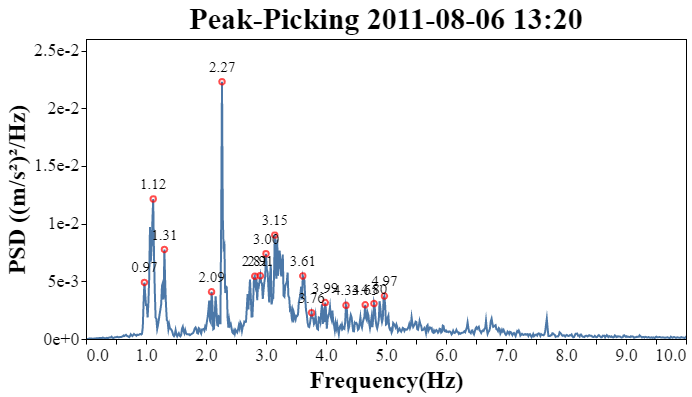

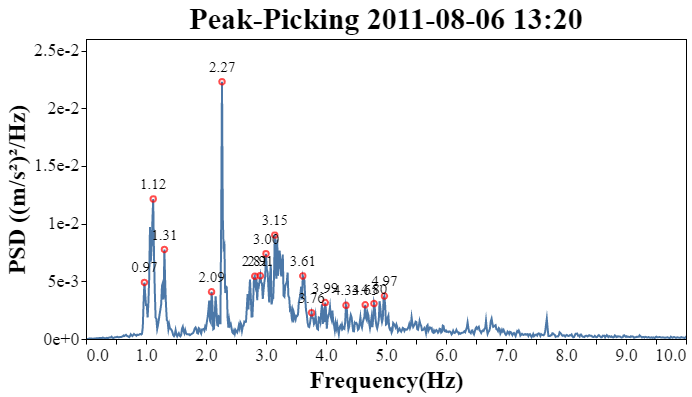

In [6]:
%%time
# 计算参数
position = '1&2&3&4&5' # 测点位置
time_stamp = pd.Timestamp('2011-08-06 13:20') # 数据起始点
long_0 = 5 # 按分钟计，用于计算的数据长度
long_1 = 5 # 按分钟计，间隔长度
Fs = 204.8 # 采样频率
filtering = [10,15] # 通带频率、阻带频率
PSDfangfa = 2 # 1为周期图法，2为多个周期图平均法
m = 4 # 平均周期图法的平分数
if_log = 0 # 是否对结果取对数
draw = 0 # 是否用matlab作图
percent = 10 # 峰值下限取最高点的百分之几
minpeakdist = 0.08 # 峰值之间最小距离
new_f = 204.8 # 降采样频率（避免滤波时数据溢出），也可用于增采样

# matlab计算 传入多列数据
加速度 = pd.DataFrame()
for i in position.split('&'):
    加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验

engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
[Frequency,PSD,Locs,Peaks] = engine.ANPSD_function_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                      'filtering', matlab.double(filtering),
                                                      'PSDfangfa', float(PSDfangfa),
                                                      'm', float(m),
                                                      'if_log', float(if_log),
                                                      'draw', float(draw),
                                                      'percent', float(percent),
                                                      'minpeakdist', float(minpeakdist),
                                                      'new_f', float(new_f),
                                                      nargout=4)

# 作图预处理
ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
ANPSD['Frequency'] = list(Frequency[0])
ANPSD['ANPSD'] = list(PSD[0])
Peak['locs'] = list(Locs[0])
Peak['pks'] = list(Peaks[0])

# 作图
time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
title_name = 'Peak-Picking ' + time_stamp_str
chart1 = (alt
          .Chart(ANPSD, title=title_name)
          .mark_line(strokeWidth=2, clip=True)
          .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,10)),
                        axis=alt.Axis(domainColor='#000', tickColor='#000')),
                  alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)',
                        axis=alt.Axis(domainColor='#000', tickColor='#000', format='~e')))
         )
chart2 = (alt
          .Chart(Peak)
          .mark_point(clip=True, color='red')\
          .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                  alt.Y('pks:Q'))
         )
text = (alt
        .Chart(Peak)
        .mark_text(clip=True,dy=-15)
        .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
                alt.Text('locs:Q',format='.2f'))
       )
chart = chart1 + chart2 + text
chart = (chart
         .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=600)
         .configure_text(font='Times New Roman', fontSize=15)
         .configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
        )[0]
chart.display()

# # 存图
# picture_path00 = picture_path0 + 'Peak-Picking/'
# if not os.path.exists(picture_path00): os.makedirs(picture_path00)
# picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
# chart.save(picture_path1, scale_factor=10)

## 组合图

In [ ]:
names = locals()
time_stamp1 = pd.Timestamp('2011-08-06 13:20')
time_stamp2 = pd.Timestamp('2011-08-06 14:00')

for ii in [1,2]: 
    time_stamp = names.get('time_stamp%d' % ii) # 数据起始点
    
    # matlab计算 传入多列数据
    加速度 = pd.DataFrame()
    for i in position.split('&'):
        加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [Frequency,PSD,Locs,Peaks] = engine.ANPSD_function_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                          'filtering', matlab.double(filtering),
                                                          'PSDfangfa', float(PSDfangfa),
                                                          'm', float(m),
                                                          'if_log', float(if_log),
                                                          'draw', float(draw),
                                                          'percent', float(percent),
                                                          'minpeakdist', float(minpeakdist),
                                                          # 'new_f', float(new_f),
                                                          nargout=4)

    # 作图预处理
    ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
    ANPSD['Frequency'] = list(Frequency[0])
    ANPSD['ANPSD'] = list(PSD[0])
    Peak['locs'] = list(Locs[0])
    Peak['pks'] = list(Peaks[0])

    # 作图
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    title_name = 'Peak-Picking ' + time_stamp_str
    line = (alt
              .Chart(ANPSD, title=title_name)
              .mark_line(strokeWidth=2, clip=True)
              .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,10))),
                      alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)', axis=alt.Axis(format='~e')))
             )
    point = (alt
              .Chart(Peak)
              .mark_point(clip=True, color='red')\
              .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                      alt.Y('pks:Q'))
             )
    text = (alt
            .Chart(Peak)
            .mark_text(clip=True,dy=-15)
            .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                    alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
                    alt.Text('locs:Q',format='.2f'))
           )
    names['chart%d' % ii] = (line + point + text).properties(width=650, height=450)

# 组合
chart = ((chart1 | chart2)
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_text(font='Times New Roman', fontSize=15)
         #.configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
        )
chart.display()

# 存图
title_name = 'Peak-Picking组合图'
picture_path00 = picture_path0
if not os.path.exists(picture_path00): os.makedirs(picture_path00)
picture_path1 = picture_path00 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## 所有图

In [ ]:
# 所有参数在单张图里设置了，要先跑一下单张图
stabilization_diagram_df = pd.DataFrame([]) # 稳定图数据
start_time = pd.Timestamp('2011-08-06 13:00')
# start_time = pd.Timestamp('2011-08-06 15:36')

for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_1):  # long_1表示取点间隔
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    # matlab计算
    加速度 = pd.DataFrame()
    for i in position.split('&'):
        加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验 #long_0表示取点长度
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [Frequency,PSD,Locs,Peaks] = engine.ANPSD_function_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                          'filtering', matlab.double(filtering),
                                                          'PSDfangfa', float(PSDfangfa),
                                                          'm', float(m),
                                                          'if_log', float(if_log),
                                                          'draw', float(draw),
                                                          'percent', float(percent),
                                                          'minpeakdist', float(minpeakdist),
                                                          # 'new_f', float(new_f),
                                                          nargout=4)
    # 作图预处理
    try:
        ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
        ANPSD['Frequency'] = list(Frequency[0])
        ANPSD['ANPSD'] = list(PSD[0])
        try:
            Peak['locs'] = list(Locs[0])
            Peak['pks'] = list(Peaks[0])
        except:
            Peak['locs'] = [Locs]
            Peak['pks'] = [Peaks]
        Peak['mark'] = time_stamp_str
    except:
        continue
#     # 作图
#     title_name = 'Peak-Picking ' + time_stamp_str
#     chart1 = (alt
#               .Chart(ANPSD, title=title_name)
#               .mark_line(strokeWidth=2, clip=True)
#               .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,10)),
#                             axis=alt.Axis(domainColor='#000', tickColor='#000')),
#                       alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)',
#                             axis=alt.Axis(domainColor='#000', tickColor='#000', format='~e')))
#              )
#     chart2 = (alt
#               .Chart(Peak)
#               .mark_point(clip=True, color='red')
#               .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
#                       alt.Y('pks:Q'))
#              )
#     text = (alt
#             .Chart(Peak)
#             .mark_text(clip=True,dy=-15)
#             .encode(
#                 alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
#                 alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
#                 alt.Text('locs:Q',format='.2f'))
#            )
#     chart = chart1 + chart2 + text
#     chart = (chart
#              .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
#              .configure_title(font='Times New Roman', fontSize=30)
#              .properties(width=600)
#              .configure_text(font='Times New Roman', fontSize=15)
#              .configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
#             )[0]
#     # 存图
#     picture_path00 = picture_path0 + 'Peak-Picking/'
#     if not os.path.exists(picture_path00): os.makedirs(picture_path00)
#     picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
#     # chart.save(picture_path1, scale_factor=10) 
    # 循环中存稳定图数据
    stabilization_diagram_df = pd.concat([stabilization_diagram_df,Peak])
    
# dump稳定图数据
with open(data_path+'Peak-Picking 测点%s'%position + '稳定图数据-%d分钟-%.2f-%.2f.pkl'%(long_0,percent,minpeakdist), 'wb') as f:
    pickle.dump(stabilization_diagram_df, f)

# # 生成 Markdown
# content = ['# Peak-Picking 测点%s'%position + '\n\n']
# for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_0): 
#     time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
#     title_name = 'Peak-Picking ' + time_stamp_str
#     picture_path00 = picture_path0 + 'Peak-Picking/'
#     picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
#     content.append('## ' + title_name)
#     content.append('![](' + picture_path1 + ')\n\n')
# with open(picture_path0 + 'Peak-Picking/Peak-Picking 测点%s'%position + '.md' , 'w') as f:
#     f.writelines(content) 

# 微信通知运行完了
itchat.send('运行完啦', toUserName=friends.get('朱海涛'))

## Bar Graph

In [ ]:
with open(data_path+'Peak-Picking 测点%s'%position + '稳定图数据-%d分钟-%.2f-%.2f.pkl'%(long_0,percent,minpeakdist), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
stabilization_diagram_df

chart = (alt
         .Chart(stabilization_diagram_df)
         .mark_line()
         .encode(alt.X('locs:Q'),
                 alt.Y('sum_pks:Q'))
         .transform_aggregate(sum_pks='sum(pks)', groupby=['locs'])
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=800, height=300)
         # .interactive() # 交互性设置 bind_y = False
        )

chart

In [ ]:
# 不同测点单算时候的频率
1:[0.973,1.107,1.295,2.28]
2:[1.107,1.293,2.28,2.8]
3:[0.973,2.28]
4:[0.973,1.093,2.107,2.28]
5:[1.107,1.293,2.107,2.28]

## 稳定图1

In [ ]:
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data0'):
    with open(pkl_path+'data0.pkl','rb') as f:
        data0 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')

## chart1: Mean Wind
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
chart1 = (alt.Chart(average_wind.reset_index(), title='')
         .mark_line(strokeWidth=2.5)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.X('uxy_mean:Q', title=' Mean (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=700)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart2: Mean_RMS luctuating Wind
fluctuating_wind = data0[['u']]
Mean_RMS = pd.DataFrame(fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time].u
                        + average_wind.uxy_mean, columns=['Mean_RMS'])
Mean_RMS = Mean_RMS[start_time:end_time].reset_index().melt('index', var_name='wind_type', value_name='Mean_RMS')
# 作图
chart2 = (alt.Chart(Mean_RMS,title='')
         .mark_line(strokeWidth=2.5, clip=True)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format=('%0H:%0M'))),
                 alt.X('Mean_RMS:Q', title='Mean+RMS (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=700)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart3: stabilization_diagram
# 所有参数在单张图里设置了，要先跑一下单张图
with open(data_path+'Peak-Picking 测点%s'%position + '稳定图数据-%d分钟-%.2f-%.2f.pkl'%(long_0,percent,minpeakdist), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
title_name = 'Time Stability Diagram of Natural Frequencies'
stabilization_diagram_df.index = pd.DatetimeIndex(stabilization_diagram_df['mark'])
stabilization_diagram_df = stabilization_diagram_df[start_time:end_time]
chart3 = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_circle(strokeWidth=3.5, fillOpacity=0.9, size=60, clip=True)
         .encode(alt.X('locs:Q', title='Frequency (Hz)',scale=alt.Scale(domain=(0.5,5), nice=False)),
                 alt.Y('mark:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.Color('mark:N', legend=None, scale=alt.Scale(scheme=alt.SchemeParams('viridis', extent=[0.1,0.6]))
                          ))
         .properties(width=1000, height=700)
#          .interactive(bind_y = False) # 交互性设置
        )

## chart1 | chart2 | chart3
chart = ((alt.hconcat(chart1,chart2,title=alt.TitleParams('Wind Characteristics',dx=115,dy=35)) | chart3)
         .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         #.configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## 稳定图2

In [ ]:
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data0'):
    with open(pkl_path+'data0.pkl','rb') as f:
        data0 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')

## chart1: Mean Wind
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
chart1 = (alt.Chart(average_wind.reset_index(), title='')
         .mark_line(strokeWidth=2.5)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.X('uxy_mean:Q', title=' Mean (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=800)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart2: Mean_RMS luctuating Wind
fluctuating_wind = data0[['u']]
Mean_RMS = pd.DataFrame(fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time].u + average_wind.uxy_mean, columns=['Mean_RMS'])
Mean_RMS = Mean_RMS[start_time:end_time].reset_index().melt('index', var_name='wind_type', value_name='Mean_RMS')
# 作图
chart2 = (alt.Chart(Mean_RMS,title='')
         .mark_line(strokeWidth=2.5, clip=True)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format=('%0H:%0M'))),
                 alt.X('Mean_RMS:Q', title='Mean+RMS (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=800)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart3: stabilization_diagram
# 所有参数在单张图里设置了，要先跑一下单张图
with open(data_path+'Peak-Picking 测点%s'%position + '稳定图数据-%d分钟-%.2f-%.2f.pkl'%(long_0,percent,minpeakdist), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
title_name = 'Time Stability Diagram of Natural Frequencies'
stabilization_diagram_df.index = pd.DatetimeIndex(stabilization_diagram_df['mark'])
stabilization_diagram_df = stabilization_diagram_df[start_time:end_time]
mark2 = [0]; temp = 0
for ii in range(len(stabilization_diagram_df.mark)):
    if ii == len(stabilization_diagram_df.mark)-1:
        temp += 1
        mark2.append(temp)
    elif stabilization_diagram_df.mark[ii]==stabilization_diagram_df.mark[ii+1]:
        temp += 1
        mark2.append(temp)
    else:
        temp += 1
        mark2.append(temp)
        temp = 0
stabilization_diagram_df['mark2']  = mark2[1:]
chart3 = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_circle(strokeWidth=3.5, fillOpacity=1, size=60, clip=True)
         .encode(alt.X('locs:Q', title='Frequency (Hz)', scale=alt.Scale(domain=(0.5,4), nice=False)),
                 alt.Y('mark:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.Color('mark2:N', legend=alt.Legend(title='Order', values=[str(x) for x in range(1,23)])))
         .properties(width=1000, height=800)
         # .interactive(bind_y = False) # 交互性设置
        )

## chart1 | chart2 | chart3
chart = ((alt.hconcat(chart1,chart2,title=alt.TitleParams('Wind Characteristics',dx=115,dy=35)) | chart3)
         .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_legend(titleFont='Times New Roman', titleFontSize=20, titleFontWeight='bold', 
                           labelFont='Times New Roman', labelFontSize=20, labelFontWeight='bold', titlePadding=20, #symbolOffset=50,
                           symbolStrokeWidth=4, symbolSize=200, rowPadding=15, labelLimit=400)
         # .configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

In [ ]:
a=np.array([0.973333333,0.986666666,1])
print(a[1:]-a[:-1])

a=np.array([1.08,1.093333333,1.106666666666,1.12])
print(a[1:]-a[:-1])

a=np.array([1.266666666666,1.28,1.293333333,1.306666666666,1.32])
print(a[1:]-a[:-1])

## 频率与风速关系

In [ ]:
def frequency_with_wind(wind, title0):
    # 跑一遍稳定图，再跑这个
    correlation_coefficient = []
    Std = []
    Frequency_domain = [[0.95,1.02],[1.075,1.13],[1.26,1.321],[2,2.2],[2.2,2.4]]
    Frequency_dict = {0:'First-order Frequency', 1:'Second-order Frequency', 2:'Third-order Frequency', 3:'Fourth-order Frequency', 4:'Fifth-order Frequency'}
#     try:
#         wind = wind.drop(index=pd.Timestamp('2011-08-07 01:25'))
#         wind = wind.drop(index=pd.Timestamp('2011-08-06 23:05'))
#         wind = wind.drop(index=pd.Timestamp('2011-08-06 17:20'))
#     except:
#         pass

    for ii in range(len(Frequency_domain)):
        names['Frequency%d'%ii] = stabilization_diagram_df[(stabilization_diagram_df.locs>Frequency_domain[ii][0])&(stabilization_diagram_df.locs<Frequency_domain[ii][1])][['locs']]
        names['Frequency%d'%ii] = names['Frequency%d'%ii].loc[names['Frequency%d'%ii].index.drop_duplicates(keep=False),:]
        names['Wind_Frequency%d'%ii] = pd.concat([wind,names['Frequency%d'%ii]],axis=1,join='inner')
        names['chart%d'%ii] = (alt
                               .Chart(names.get('Wind_Frequency%d'%ii), title=Frequency_dict.get(ii))
                               .mark_circle(strokeWidth=3.5, size=60, clip=False)
                               .encode(alt.X('%s'%wind.keys()[0], title=title0, scale=alt.Scale(zero=False)),
                                       alt.Y('locs', title='Frequency (Hz)', 
                                             scale=alt.Scale(nice=False, domain=(
                                                 names['Wind_Frequency%d'%ii].locs.min()-0.02, 
                                                 names['Wind_Frequency%d'%ii].locs.max()+0.015))),
                                       tooltip = names['Wind_Frequency%d'%ii].keys().tolist())
                              )
        print('%s:%.4f'%(Frequency_dict.get(ii),names['Frequency%d'%ii].locs.mean()))
        correlation_coefficient.append(round(names['Wind_Frequency%d'%ii][wind.keys()[0]].corr(names.get('Wind_Frequency%d'%ii)['locs']),4))
        Std.append(round((names['Frequency%d'%ii]['locs'].std()),4))
    print('Std.为:%sHz'%Std)
    print('相关系数为:%s'%correlation_coefficient)

    chart = ((chart0 | chart1 | chart2 | chart3 | chart4)
             .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
             .configure_title(font='Times New Roman', fontSize=30)
            )
    chart.display()

print('***************************************************************************************************************************************************************************')
print('与加速度RMS关系：')
acc_RMS = pd.DataFrame(acc.mean(axis=1).resample('%fT'%long_1).std()[start_time:end_time], columns=['acc_RMS'])
frequency_with_wind(acc_RMS, 'RMS Acceleration (m/s²)')

print('***************************************************************************************************************************************************************************')
print('与平均风速关系：')
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
frequency_with_wind(average_wind, 'Mean Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与最大风速关系：')
max_wind = data0[['uxy']].resample('%fT'%long_1).max()[start_time:end_time]
frequency_with_wind(max_wind, 'Max Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
frequency_with_wind(RMS, 'RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Mean+RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
Mean_plus_RMS = pd.DataFrame(RMS.u+average_wind.uxy_mean,columns=['Mean_RMS'])
frequency_with_wind(Mean_plus_RMS, 'Mean + RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Gust Factor关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
gust_factor_u = data1['gust_factor'][['gust_factor_u']][start_time:end_time]
frequency_with_wind(gust_factor_u, 'Gust Factor')

print('***************************************************************************************************************************************************************************')
print('与Turbulence Intensity关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
turbulence_intensity_u = data1['turbulence_intensity'][['turbulence_intensity_u']][start_time:end_time]
frequency_with_wind(turbulence_intensity_u, 'Turbulence Intensity_u')

# NExT+Peak-Picking

## 单张图

In [ ]:
## NExT+Peak-Picking
# 计算参数
position = '1&3' # 测点位置
position1 = int(position.split('&')[0]) # 第一个测点位置
position2 = int(position.split('&')[1]) # 第二个测点位置
time_stamp = pd.Timestamp('2011-08-06 15:00') # 数据起始点
long_0 = 5 # 按分钟计，用于计算的数据长度
long_1 = 5 # 按分钟计，间隔长度
Fs = 204.8 # 采样频率
long_out = 60*4*Fs # NExT+Peak-Picking输出长度,按个数计
draw = 0 # 是否用matlab作互相关函数时程曲线图
method = 3 # 具体含义见matlab脚本

# matlab计算
long=pd.Timedelta('%fT'%long_0);Fs=float(Fs);long_out=float(long_out);draw=float(draw);method=float(method)
engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
engine.close('all')
[t,r] = engine.NExT_function_py(matlab.double(acc[position1-1][time_stamp:time_stamp+long].tolist())[0],
                                matlab.double(acc[position2-1][time_stamp:time_stamp+long].tolist())[0],
                                Fs,long_out,draw,method,nargout=2)

## Peak-Picking
# 计算参数
Fs = 204.8 # 采样频率
filtering = [10,15] # 通带频率、阻带频率
PSDfangfa = 2 # 1为周期图法，2为多个周期图平均法
m = 4 # 平均周期图法的平分数
if_log = 0 # 是否对结果取对数
draw = 0 # 是否用matlab作图
percent = 10 # 峰值下限取最高点的百分之几
minpeakdist = 0.08 # 峰值之间最小距离
new_f = 204.8 # 降采样频率（避免滤波时数据溢出），也可用于增采样

# matlab计算 传入NExT处理后的数据
engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
[Frequency,PSD,Locs,Peaks] = engine.ANPSD_function_py(r, float(Fs),
                                                      'filtering', matlab.double(filtering),
                                                      'PSDfangfa', float(PSDfangfa),
                                                      'm', float(m),
                                                      'if_log', float(if_log),
                                                      'draw', float(draw),
                                                      'percent', float(percent),
                                                      'minpeakdist', float(minpeakdist),
                                                      # 'new_f', float(new_f),
                                                      nargout=4)

# 作图预处理
ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
ANPSD['Frequency'] = list(Frequency[0])
ANPSD['ANPSD'] = list(PSD[0])
try:
    Peak['locs'] = list(Locs[0])
    Peak['pks'] = list(Peaks[0])
except:
    Peak['locs'] = [Locs]
    Peak['pks'] = [Peaks]

# 作图
time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
title_name = 'NExT+Peak-Picking ' + time_stamp_str
chart1 = (alt
          .Chart(ANPSD, title=title_name)
          .mark_line(strokeWidth=2, clip=True)
          .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,10)),
                        axis=alt.Axis(domainColor='#000', tickColor='#000')),
                  alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)',
                        axis=alt.Axis(domainColor='#000', tickColor='#000', format='~e')))
         )
chart2 = (alt
          .Chart(Peak)
          .mark_point(clip=True, color='red')
          .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                  alt.Y('pks:Q'))
         )
text = (alt
        .Chart(Peak)
        .mark_text(clip=True,dy=-15)
        .encode(
            alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
            alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
            alt.Text('locs:Q',format='.2f'))
       )
chart = chart1 + chart2 + text
chart = (chart
         .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=600)
         .configure_text(font='Times New Roman', fontSize=15)
         .configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
        )[0]
chart.display()

# # 存图
# picture_path00 = picture_path0 + 'NExT+Peak-Picking + Peak-Picking/'
# if not os.path.exists(picture_path00): os.makedirs(picture_path00)
# picture_path2 = picture_path00 + title_name.replace(':','@') + '.svg'
# chart.save(picture_path1, scale_factor=10)

## 组合图

In [ ]:
names = locals()
time_stamp1 = pd.Timestamp('2011-08-06 15:00')
time_stamp2 = pd.Timestamp('2011-08-07 03:00')

for ii in [1,2]: 
    time_stamp = names.get('time_stamp%d' % ii) # 数据起始点
    
    # 计算参数
    position = '1&3' # 测点位置
    position1 = int(position.split('&')[0]) # 第一个测点位置
    position2 = int(position.split('&')[1]) # 第二个测点位置
    long_0 = 5 # 按分钟计，用于计算的数据长度
    Fs = 204.8 # 采样频率
    long_out = 60*4*Fs # NExT+Peak-Picking输出长度,按个数计
    draw = 0 # 是否用matlab作互相关函数时程曲线图
    method = 3 # 具体含义见matlab脚本

    # matlab计算
    long=pd.Timedelta('%fT'%long_0);Fs=float(Fs);long_out=float(long_out);draw=float(draw);method=float(method)
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    engine.close('all')
    [t,r] = engine.NExT_function_py(matlab.double(acc[position1-1][time_stamp:time_stamp+long].tolist())[0],
                                    matlab.double(acc[position2-1][time_stamp:time_stamp+long].tolist())[0],
                                    Fs,long_out,draw,method,nargout=2)
    # 作图预处理
    NExT = pd.DataFrame([])
    NExT['t'] = list(t[0])
    NExT['r'] = list(r[0])
    NExT = NExT.iloc[np.arange(NExT.index[0], NExT.index[-1],10)]
    
    # 作图
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    title_name = 'NExT ' + time_stamp_str
    domain = {1:(-1.5e-6,1.5e-6), 2:(-1.5e-5,1.5e-5)}
    strokeWidth = {1:1.5, 2:1.5}
    names['chart%d_NExT' % ii] = (alt
              .Chart(NExT, title=title_name)
              .mark_line(strokeWidth=strokeWidth.get(ii), clip=True)
              .encode(alt.X('t:Q', title='Seconds (s)', scale=alt.Scale(domain=(0,200))),
                      alt.Y('r:Q', title='Acceleration (m/s²)', scale=alt.Scale(domain=domain.get(ii), nice=False), axis=alt.Axis(format='~e')))
              .properties(width=650, height=300)
             )

    # 计算参数
    Fs = 204.8 # 采样频率
    filtering = [10,15] # 通带频率、阻带频率
    PSDfangfa = 2 # 1为周期图法，2为多个周期图平均法
    m = 4 # 平均周期图法的平分数
    if_log = 0 # 是否对结果取对数
    draw = 0 # 是否用matlab作图
    percent = 10 # 峰值下限取最高点的百分之几
    minpeakdist = 0.08 # 峰值之间最小距离
    new_f = 204.8 # 降采样频率（避免滤波时数据溢出），也可用于增采样

    # matlab计算 传入NExT处理后的数据
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [Frequency,PSD,Locs,Peaks] = engine.ANPSD_function_py(r, float(Fs),
                                                          'filtering', matlab.double(filtering),
                                                          'PSDfangfa', float(PSDfangfa),
                                                          'm', float(m),
                                                          'if_log', float(if_log),
                                                          'draw', float(draw),
                                                          'percent', float(percent),
                                                          'minpeakdist', float(minpeakdist),
                                                          # 'new_f', float(new_f),
                                                          nargout=4)

    # 作图预处理
    ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
    ANPSD['Frequency'] = list(Frequency[0])
    ANPSD['ANPSD'] = list(PSD[0])
    Peak['locs'] = list(Locs[0])
    Peak['pks'] = list(Peaks[0])

    # 作图
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    title_name = 'NExT+Peak-Picking ' + time_stamp_str
    line = (alt
              .Chart(ANPSD, title=title_name)
              .mark_line(strokeWidth=2.5, clip=True)
              .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,8))),
                      alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)', axis=alt.Axis(format='~e')))
             )
    point = (alt
              .Chart(Peak)
              .mark_point(strokeWidth=3.5, size=20, clip=True, color='red')
              .encode(alt.X('locs:Q'), alt.Y('pks:Q'))
             )
    text = (alt
            .Chart(Peak)
            .mark_text(clip=True,dy=-15)
            .encode(alt.X('locs:Q'), alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
                    alt.Text('locs:Q',format='.2f'))
           )
    names['chart%d' % ii] = (line + point + text).properties(width=650, height=360)

# 组合1
chart_NExT = ((chart1_NExT | chart2_NExT)
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_text(font='Times New Roman', fontSize=15)
         #.configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
        )
chart_NExT.display()

# 组合2
chart = ((chart1 | chart2)
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_text(font='Times New Roman', fontSize=15)
         #.configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
        )
chart.display()

# 存图
title_name = 'NExT Curve组合图'
picture_path00 = picture_path0
if not os.path.exists(picture_path00): os.makedirs(picture_path00)
picture_path1 = picture_path00 + title_name + '.png'
# chart_NExT.save(picture_path1, scale_factor=10)

## 所有图

In [ ]:
# 所有参数在单张图里设置了，要先跑一下单张图
stabilization_diagram_df = pd.DataFrame([]) # 稳定图数据
for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_1): 
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    ## NExT+Peak-Picking
    long=pd.Timedelta('%fT'%long_0);Fs=float(Fs);long_out=float(long_out);draw=float(draw);method=float(method)
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    engine.close('all')
    [t,r] = engine.NExT_function_py(matlab.double(acc[position1-1][time_stamp:time_stamp+long].tolist())[0],
                                    matlab.double(acc[position2-1][time_stamp:time_stamp+long].tolist())[0],
                                    Fs,long_out,draw,method,nargout=2)
    ## Peak-Picking
    # matlab计算 传入NExT+Peak-Picking处理后的数据
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [Frequency,PSD,Locs,Peaks] = engine.ANPSD_function_py(r, float(Fs),
                                                          'filtering', matlab.double(filtering),
                                                          'PSDfangfa', float(PSDfangfa),
                                                          'm', float(m),
                                                          'if_log', float(if_log),
                                                          'draw', float(draw),
                                                          'percent', float(percent),
                                                          'minpeakdist', float(minpeakdist),
                                                          # 'new_f', float(new_f),
                                                          nargout=4)
    # 作图预处理
    try:
        ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
        ANPSD['Frequency'] = list(Frequency[0])
        ANPSD['ANPSD'] = list(PSD[0])
        try:
            Peak['locs'] = list(Locs[0])
            Peak['pks'] = list(Peaks[0])
        except:
            Peak['locs'] = [Locs]
            Peak['pks'] = [Peaks]
        Peak['mark'] = time_stamp_str
    except:
        continue
#     # 作图
#     time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
#     title_name = 'NExT+Peak-Picking ' + time_stamp_str
#     chart1 = (alt
#               .Chart(ANPSD, title=title_name)
#               .mark_line(strokeWidth=2, clip=True)
#               .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,10)),
#                             axis=alt.Axis(domainColor='#000', tickColor='#000')),
#                       alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)',
#                             axis=alt.Axis(domainColor='#000', tickColor='#000', format='~e')))
#              )
#     chart2 = (alt
#               .Chart(Peak)
#               .mark_point(clip=True, color='red')\
#               .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
#                       alt.Y('pks:Q'))
#              )
#     text = (alt
#             .Chart(Peak)
#             .mark_text(clip=True,dy=-15)
#             .encode(
#                 alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
#                 alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
#                 alt.Text('locs:Q',format='.2f'))
#            )
#     chart = chart1 + chart2 + text
#     chart = (chart
#              .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
#              .configure_title(font='Times New Roman', fontSize=30)
#              .properties(width=600)
#              .configure_text(font='Times New Roman', fontSize=15)
#              .configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
#             )[0]
#     # 存图
#     picture_path00 = picture_path0 + 'NExT+Peak-Picking/'
#     if not os.path.exists(picture_path00): os.makedirs(picture_path00)
#     picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
#     # chart.save(picture_path1, scale_factor=10)
    # 循环中存稳定图数据
    stabilization_diagram_df = pd.concat([stabilization_diagram_df,Peak])

# dump稳定图数据
with open(data_path+'NExT+Peak-Picking 测点%s'%position + '稳定图数据-%d分钟-%.2f-%.2f.pkl'%(long_0,percent,minpeakdist), 'wb') as f:
    pickle.dump(stabilization_diagram_df, f)

# # 生成 Markdown
# content = ['# NExT+Peak-Picking 测点%s'%position + '\n\n']
# for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_0): 
#     time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
#     title_name = 'NExT+Peak-Picking ' + time_stamp_str
#     picture_path00 = picture_path0 + 'NExT+Peak-Picking/'
#     picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
#     content.append('## ' + title_name)
#     content.append('![](' + picture_path1 + ')\n\n')
# with open(picture_path0 + 'NExT+Peak-Picking/NExT+Peak-Picking 测点%s'%position + '.md', 'w') as f:
#     f.writelines(content)

# 微信通知运行完了
itchat.send('运行完啦', toUserName=friends.get('朱海涛'))

## 稳定图

In [ ]:
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data0'):
    with open(pkl_path+'data0.pkl','rb') as f:
        data0 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
# start_time = pd.Timestamp('2011-08-07 01:00'); end_time = pd.Timestamp('2011-08-07 05:00')
## chart1: Mean Wind
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
chart1 = (alt.Chart(average_wind.reset_index(), title='')
         .mark_line(strokeWidth=2.2)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.X('uxy_mean:Q', title=' Mean (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=500)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart2: RMS luctuating Wind
fluctuating_wind = data0[['u']]
RMS = fluctuating_wind.resample('%fT'%long_1).std()
RMS = RMS[start_time:end_time].reset_index().melt('index', var_name='wind_type', value_name='RMS')
# 作图
chart2 = (alt.Chart(RMS,title='')
         .mark_line(strokeWidth=2.2, clip=True)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format=('%0H:%0M'))),
                 alt.X('RMS:Q', title='RMS (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=500)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart3: stabilization_diagram
# 所有参数在单张图里设置了，要先跑一下单张图
with open(data_path+'NExT+Peak-Picking 测点%s'%position + '稳定图数据-%d分钟-%.2f-%.2f.pkl'%(long_0,percent,minpeakdist), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
title_name = 'NExT+Peak-Picking Stabilization Diagram'
stabilization_diagram_df.index = pd.DatetimeIndex(stabilization_diagram_df['mark'])
stabilization_diagram_df = stabilization_diagram_df[start_time:end_time]

mark2 = [0]; temp = 0
for ii in range(len(stabilization_diagram_df.mark)):
    if ii == len(stabilization_diagram_df.mark)-1:
        temp += 1
        mark2.append(temp)
    elif stabilization_diagram_df.mark[ii]==stabilization_diagram_df.mark[ii+1]:
        temp += 1
        mark2.append(temp)
    else:
        temp += 1
        mark2.append(temp)
        temp = 0
stabilization_diagram_df['mark2']  = mark2[1:]

chart3 = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_point(strokeWidth=3.5, size=20, clip=True)
         .encode(alt.X('locs:Q', title='Frequency (Hz)',scale=alt.Scale(domain=(0.5,5), nice=False),
                       axis=alt.Axis(domainColor='#000', tickColor='#000')),
                 alt.Y('mark:T', title=None,
                       axis=alt.Axis(domainColor='#000', tickColor='#000', format='%0H:%0M')),
                 alt.Color('mark2:N', legend=None))
         .properties(width=1000, height=500)
         .interactive(bind_y = False) # 交互性设置
        )

## chart1 | chart2 | chart3
chart = ((alt.hconcat(chart1,chart2,title=alt.TitleParams('Wind Characteristics',dx=115,dy=35)) | chart3)
         .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         #.configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

# AFDD

## 单张图

In [ ]:
# 计算参数
position = '1&2&3&4&5' # 测点位置
time_stamp = pd.Timestamp('2011-08-06 13:00') # 数据起始点
long_0 = 5 # 按分钟计，用于计算的数据长度
long_1 = 5 # 按分钟计，间隔长度
Fs = 204.8 # 采样频率
Nmodes = 20 # 提取模态数目
draw = 0 # 是否用matlab作图
Ts = 60 # (for estimation of damping ratio only)(NExT+Peak-Picking) option for duration of autocorrelation function 

# matlab计算
long=pd.Timedelta('%fT'%long_0);Fs=float(Fs);Nmodes=float(Nmodes);draw=float(draw);Ts=float(Ts)
engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
[phi,fn,zeta,Frequency,PSD,Locs,Peaks] = engine.AFDD_function_py(matlab.double(np.array(acc[time_stamp:time_stamp+long].T).tolist()),
                                         Fs,Nmodes,'PickingMethod','auto','dataPlot',draw,'Ts',Ts,nargout=7)
# 作图预处理
phi = pd.DataFrame(np.array(phi)); fn = list(fn[0]); zeta = list(zeta[0])
ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
ANPSD['Frequency'] = list(Frequency[0])
ANPSD['ANPSD'] = list(PSD[0])
Peak['locs'] = list(Locs[0])
Peak['pks'] = list(Peaks[0])

# 作图
time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
title_name = 'Peak-Picking(AFDD) ' + time_stamp_str
chart1 = (alt
          .Chart(ANPSD, title=title_name)
          .mark_line(strokeWidth=2, clip=True)
          .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,10)),
                        axis=alt.Axis(domainColor='#000', tickColor='#000')),
                  alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)',
                        axis=alt.Axis(domainColor='#000', tickColor='#000', format='~e')))
         )
chart2 = (alt
          .Chart(Peak)
          .mark_point(clip=True, color='red')\
          .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                  alt.Y('pks:Q'))
         )
text = (alt
        .Chart(Peak)
        .mark_text(clip=True,dy=-15)
        .encode(
            alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
            alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
            alt.Text('locs:Q',format='.2f'))
       )
chart = chart1 + chart2 + text
chart = (chart
         .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=600)
         .configure_text(font='Times New Roman', fontSize=15)
         .configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
        )[0]
chart.display()

# # 存图
# picture_path00 = picture_path0 + 'AFDD/'
# if not os.path.exists(picture_path00): os.makedirs(picture_path00)
# picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
# chart.save(picture_path1, scale_factor=10)

## 所有图

In [ ]:
# 所有参数在单张图里设置了，要先跑一下单张图
stabilization_diagram_df = pd.DataFrame([]) # 稳定图数据
for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_0): 
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')    
    # matlab计算
    long=pd.Timedelta('%fT'%long_0);Fs=float(Fs);Nmodes=float(Nmodes);draw=float(draw);Ts=float(Ts)
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [phi,fn,zeta,Frequency,PSD,Locs,Peaks] = engine.AFDD_function_py(matlab.double(np.array(acc[time_stamp:time_stamp+long].T).tolist()),
                                             Fs,Nmodes,'PickingMethod','auto','dataPlot',draw,'Ts',Ts,nargout=7)
    # 作图预处理
    try:
        ANPSD = pd.DataFrame([]); Peak = pd.DataFrame([])
        ANPSD['Frequency'] = list(Frequency[0])
        ANPSD['ANPSD'] = list(PSD[0])
        Peak['locs'] = list(Locs[0])
        Peak['pks'] = list(Peaks[0])
        Peak['damping_ratio'] = list(zeta[0])
        Peak['fn'] = list(fn[0])
        phi = pd.DataFrame(np.array(phi),columns=['mode1','mode2','mode3','mode4','mode5'])
        Peak = pd.concat([Peak,phi],axis=1)
        Peak['mark'] = time_stamp_str
    except:
        continue
    # 作图
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    title_name = 'Peak-Picking(AFDD) ' + time_stamp_str
    chart1 = (alt
              .Chart(ANPSD, title=title_name)
              .mark_line(strokeWidth=2, clip=True)
              .encode(alt.X('Frequency:Q', title='Frequency(Hz)', scale=alt.Scale(domain=(0,10)),
                            axis=alt.Axis(domainColor='#000', tickColor='#000')),
                      alt.Y('ANPSD:Q', title='PSD ((m/s²)²/Hz)',
                            axis=alt.Axis(domainColor='#000', tickColor='#000', format='~e')))
             )
    chart2 = (alt
              .Chart(Peak)
              .mark_point(clip=True, color='red')\
              .encode(alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                      alt.Y('pks:Q'))
             )
    text = (alt
            .Chart(Peak)
            .mark_text(clip=True,dy=-15)
            .encode(
                alt.X('locs:Q', scale=alt.Scale(domain=(0,10))),
                alt.Y('pks:Q', scale=alt.Scale(domain=(0,Peak['pks'].max()*1.1))),
                alt.Text('locs:Q',format='.2f'))
           )
    chart = chart1 + chart2 + text
    chart = (chart
             .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
             .configure_title(font='Times New Roman', fontSize=30)
             .properties(width=600)
             .configure_text(font='Times New Roman', fontSize=15)
             .configure_view(stroke='#000'), # 黑色外边框，需设置grid=False才能看到
            )[0]
    # 存图
    picture_path00 = picture_path0 + 'AFDD/'
    if not os.path.exists(picture_path00): os.makedirs(picture_path00)
    picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
    # chart.save(picture_path1, scale_factor=10)
    # 循环中存稳定图数据
    stabilization_diagram_df = pd.concat([stabilization_diagram_df,Peak])
       
# dump稳定图数据
with open(data_path+'AFDD 测点%s'%position + '稳定图数据-%d分钟.pkl'%(long_0), 'wb') as f:
    pickle.dump(stabilization_diagram_df, f)

# 生成 Markdown
content = ['# AFDD 测点%s'%position + '\n\n']
for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_0): 
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    title_name = 'Peak-Picking(AFDD) ' + time_stamp_str
    picture_path00 = picture_path0 + 'AFDD/'
    picture_path1 = picture_path00 + title_name.replace(':','@') + '.png'
    content.append('## ' + title_name)
    content.append('![](' + picture_path1 + ')\n\n')
with open(picture_path0 + 'AFDD/AFDD 测点%s'%position + '.md', 'w') as f:
    f.writelines(content)

## 频率稳定图

In [ ]:
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data0'):
    with open(pkl_path+'data0.pkl','rb') as f:
        data0 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
# start_time = pd.Timestamp('2011-08-07 01:00'); end_time = pd.Timestamp('2011-08-07 05:00')
## chart1: Mean Wind
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
chart1 = (alt.Chart(average_wind.reset_index(), title='')
         .mark_line(strokeWidth=2.2)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.X('uxy_mean:Q', title=' Mean (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=500)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart2: RMS luctuating Wind
fluctuating_wind = data0[['u']]
RMS = fluctuating_wind.resample('%fT'%long_1).std()
RMS = RMS[start_time:end_time].reset_index().melt('index', var_name='wind_type', value_name='RMS')
# 作图
chart2 = (alt.Chart(RMS,title='')
         .mark_line(strokeWidth=2.2, clip=True)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format=('%0H:%0M'))),
                 alt.X('RMS:Q', title='RMS (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=500)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart3: stabilization_diagram
# 所有参数在单张图里设置了，要先跑一下单张图
with open(data_path+'AFDD 测点%s'%position + '稳定图数据-%d分钟.pkl'%(long_0), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
title_name = 'AFDD Stabilization Diagram'
stabilization_diagram_df.index = pd.DatetimeIndex(stabilization_diagram_df['mark'])
stabilization_diagram_df = stabilization_diagram_df[start_time:end_time]
mark2 = [0]; temp = 0
for ii in range(len(stabilization_diagram_df.mark)):
    if ii == len(stabilization_diagram_df.mark)-1:
        temp += 1
        mark2.append(temp)
    elif stabilization_diagram_df.mark[ii]==stabilization_diagram_df.mark[ii+1]:
        temp += 1
        mark2.append(temp)
    else:
        temp += 1
        mark2.append(temp)
        temp = 0
stabilization_diagram_df['mark2']  = mark2[1:]
chart3 = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_point(strokeWidth=3.5, size=20, clip=True)
         .encode(alt.X('locs:Q', title='Frequency (Hz)', scale=alt.Scale(domain=(0.5,5), nice=False)),
                 alt.Y('mark:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.Color('mark2:N', legend=None))
         .properties(width=1000, height=500)
         .interactive(bind_y = False) # 交互性设置
        )

## chart1 | chart2 | chart3
chart = ((alt.hconcat(chart1,chart2,title=alt.TitleParams('Wind Characteristics',dx=100,dy=35)) | chart3)
         .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         #.configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

In [ ]:
a=np.array([0.974841334418,0.983173311635,0.991505288853])
print(a[1:]-a[:-1])
a=np.array([1.08315703824,1.09148901546,1.09982099268,1.10815296989])
print(a[1:]-a[:-1])
a=np.array([1.26646053702,1.27479251424,1.28312449146,1.29145646867,1.29978844589,1.30812042311])
print(a[1:]-a[:-1])

## 频率与风速关系

In [ ]:
def frequency_with_wind(wind, title0):
    # 跑一遍稳定图，再跑这个
    correlation_coefficient = []
    Frequency_domain = [[0.97,1.02],[1.075,1.13],[1.26,1.321],[2,2.2],[2.2,2.4]]
    Frequency_dict = {0:'First-order Frequency', 1:'Second-order Frequency', 2:'Third-order Frequency', 3:'Fourth-order Frequency', 4:'Fifth-order Frequency'}
#     try:
#         wind = wind.drop(index=pd.Timestamp('2011-08-07 01:25'))
#         wind = wind.drop(index=pd.Timestamp('2011-08-06 23:05'))
#         wind = wind.drop(index=pd.Timestamp('2011-08-06 17:20'))
#     except:
#         pass

    for ii in range(len(Frequency_domain)):
        names['Frequency%d'%ii] = stabilization_diagram_df[(stabilization_diagram_df.locs>Frequency_domain[ii][0])&(stabilization_diagram_df.locs<Frequency_domain[ii][1])][['locs']]
        names['Frequency%d'%ii] = names['Frequency%d'%ii].loc[names['Frequency%d'%ii].index.drop_duplicates(keep=False),:]
        names['Wind_Frequency%d'%ii] = pd.concat([wind,names['Frequency%d'%ii]],axis=1,join='inner')
        names['chart%d'%ii] = (alt
                               .Chart(names.get('Wind_Frequency%d'%ii), title=Frequency_dict.get(ii))
                               .mark_circle(strokeWidth=3.5, size=60, clip=False)
                               .encode(alt.X('%s'%wind.keys()[0], title=title0, scale=alt.Scale(zero=False)),
                                       alt.Y('locs', title='Frequency (Hz)', 
                                             scale=alt.Scale(nice=False, domain=(
                                                 names['Wind_Frequency%d'%ii].locs.min()-0.02, 
                                                 names['Wind_Frequency%d'%ii].locs.max()+0.015))),
                                       tooltip = names['Wind_Frequency%d'%ii].keys().tolist())
                              )
        print('%s:%.4f'%(Frequency_dict.get(ii),names['Frequency%d'%ii].locs.mean()))
        correlation_coefficient.append(round(names['Wind_Frequency%d'%ii][wind.keys()[0]].corr(names.get('Wind_Frequency%d'%ii)['locs']),4))
    print('相关系数为:%s'%correlation_coefficient)

    chart = ((chart0 | chart1 | chart2 | chart3 | chart4)
             .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
             .configure_title(font='Times New Roman', fontSize=30)
            )
    chart.display()

print('***************************************************************************************************************************************************************************')
print('与加速度RMS关系：')
acc_RMS = pd.DataFrame(acc.mean(axis=1).resample('%fT'%long_1).std()[start_time:end_time], columns=['acc_RMS'])
frequency_with_wind(acc_RMS, 'RMS Acceleration (m/s²)')

print('***************************************************************************************************************************************************************************')
print('与平均风速关系：')
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
frequency_with_wind(average_wind, 'Mean Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与最大风速关系：')
max_wind = data0[['uxy']].resample('%fT'%long_1).max()[start_time:end_time]
frequency_with_wind(max_wind, 'Max Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
frequency_with_wind(RMS, 'RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Mean+RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
Mean_plus_RMS = pd.DataFrame(RMS.u+average_wind.uxy_mean,columns=['Mean_RMS'])
frequency_with_wind(Mean_plus_RMS, 'Mean + RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Gust Factor关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
gust_factor_u = data1['gust_factor'][['gust_factor_u']][start_time:end_time]
frequency_with_wind(gust_factor_u, 'Gust Factor')

print('***************************************************************************************************************************************************************************')
print('与Turbulence Intensity关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
turbulence_intensity_u = data1['turbulence_intensity'][['turbulence_intensity_u']][start_time:end_time]
frequency_with_wind(turbulence_intensity_u, 'Turbulence Intensity_u')

## 阻尼稳定图

In [ ]:
## chart1: stabilization_diagram
# 所有参数在单张图里设置了，要先跑一下单张图
# load稳定图数据
with open(data_path+'AFDD 测点%s'%position + '稳定图数据-%d分钟.pkl'%(long_0), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
# 选择第几阶频率
stabilization_diagram_df = stabilization_diagram_df.loc[0]
# 作稳定图
title_name = 'AFDD Stabilization Diagram (Damping ratio)'
chart1 = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_point(strokeWidth=2.5, size=10, clip=True)
         .encode(alt.X('damping_ratio:Q', title='Damping ratio',
                       axis=alt.Axis(domainColor='#000', tickColor='#000', format='%')),
                 alt.Y('mark:T', title=None,
                       axis=alt.Axis(domainColor='#000', tickColor='#000', format='%0H:%0M')),
                 alt.Color('mark:N', legend=None))
         .properties(width=900, height=400)
        )
## chart2: Original
position_Original = 1 # 测点位置
title_name1 = 'Original'
Original = pd.DataFrame([])
Original['mean'] = acc[position_Original-1].resample('%fT'%long_1).mean()
Original['max'] = acc[position_Original-1].resample('%fT'%long_1).max()
Original['min'] = acc[position_Original-1].resample('%fT'%long_1).min()
Original = Original[start_time:end_time].reset_index().melt('index', var_name='Position%d'%position_Original, value_name='Original')
chart2 = (alt
         .Chart(Original, title=title_name1)
         .mark_line(strokeWidth=1.5)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(domainColor='#000', tickColor='#000', format='%0H:%0M')), # tickCount=15
                 alt.X('Original:Q', title='Acceleration (m/s²)', axis=alt.Axis(domainColor='#000', tickColor='#000')),
                 alt.Color('Position%d:N'%position_Original, legend=None))
         .properties(width=150, height=400)
         #.interactive(bind_x = False) # 交互性设置
         )
## chart2 | chart1
chart = ((chart2 | chart1)
         .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## 振幅-阻尼图

In [ ]:
## damping_ratio
# 所有参数在单张图里设置了，要先跑一下单张图
# load稳定图数据
with open(data_path+'AFDD 测点%s'%position + '稳定图数据-%d分钟.pkl'%(long_0), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
# 选择第几阶频率
stabilization_diagram_df = stabilization_diagram_df.loc[0]
Damping_mode = 'damping_ratio'

## RMS
# 计算
position_Original = 1
RMS = acc.resample('%fT'%long_0).std()
RMS.columns = ['Position1','Position2','Position3','Position4','Position5']
RMS = RMS[start_time:end_time]['Position%d'%position_Original]

## RMS_Damping
RMS_Damping = pd.DataFrame([])
RMS_Damping['damping_ratio'] = stabilization_diagram_df.damping_ratio
RMS_Damping['RMS'] = RMS.values
# RMS_Damping = RMS_Damping[RMS_Damping['damping_ratio']<0.04]

# 拟合
n = 1 # 拟合次数
poly_data = pd.DataFrame({'RMS': np.linspace(RMS_Damping['RMS'].min(), RMS_Damping['RMS'].max(), 20)})
slope = np.polyfit(RMS_Damping['RMS'], RMS_Damping[Damping_mode], n)
poly_data[Damping_mode] = np.poly1d(slope)(poly_data['RMS'])
poly_data['legend'] = 'Fitted curve'
# print('RMS_Acceleration = %f RMS_Wind_%s² + %f RMS_Wind_%s + %f'%(slope[0],Damping_mode,slope[1],Damping_mode,slope[2]))

# 作图
title_name = 'Variation of RMS Acceleration with RMS Fluctuating Wind Speed (%s)' % (Damping_mode)
# 点图
Point = (alt
         .Chart(RMS_Damping, title='')
         .mark_point(strokeWidth=6, size=30, clip=True)
         .encode(alt.X('RMS:Q', axis=alt.Axis(domainColor='#000', tickColor='#000')),
                 alt.Y('%s:Q' % Damping_mode, title='Damping ratio', axis=alt.Axis(domainColor='#000', tickColor='#000', format='%')),
                 alt.Color('Position:N', legend=alt.Legend(symbolStrokeWidth=6, symbolSize=30, direction='horizontal', values=['Field mesrued'])))
         )
# 拟合曲线
poly_graph = (alt.Chart(poly_data)
              .mark_line(strokeWidth=2.5)
              .encode(alt.X('RMS:Q', title='RMS Acceleration (m/s²)',
                            scale=alt.Scale(zero=False, nice=False, domain=(RMS_Damping['RMS'].min()-0.0005, RMS_Damping['RMS'].max()+0.0005))),
                      alt.Y('%s:Q' % Damping_mode, scale=alt.Scale(domain=(0,0.05), zero=False, nice=False), 
                            axis=alt.Axis(domainColor='#000', tickColor='#000', tickMinStep=0.005, format='%')),
                      alt.Color('legend:N', scale=alt.Scale(range=('red','#4c77a8')), legend=alt.Legend(symbolStrokeWidth=4,symbolSize=300)))
             )
# Box-plot
groups = pd.cut(RMS_Damping['RMS'],11,precision=4)
RMS_Damping1 = RMS_Damping.copy()
RMS_Damping1['variety'] = groups.apply(lambda x: (x.left+x.right)/2)
RMS_Damping1['legend'] = 'Box plot'
Box_plot = (alt
            .Chart(RMS_Damping1)
            .mark_boxplot(ticks=alt.MarkConfig(size=20,opacity=0.8), # extent='min-max',
                          rule=alt.MarkConfig(strokeWidth=2,opacity=0.8),
                          box=alt.MarkConfig(fill='#4682b4',fillOpacity=0.98,stroke='black',strokeWidth=2,strokeOpacity=0.5),
                          outliers=alt.MarkConfig(color='#4682b4',filled=True,size=60))
            .encode(alt.X('variety:N', axis=None), alt.Y('%s:Q' % Damping_mode, title=' '), alt.Color('legend:N'))
           )
# 总图
chart = (((Point + poly_graph).properties(width=625,height=320).resolve_scale(color='independent', shape='independent')
          |(Box_plot + poly_graph).properties(width=675,height=320).resolve_scale(color='independent', shape='independent'))
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_legend(title=None,labelFont='Times New Roman',labelFontSize=24, labelFontWeight='bold',
                           orient='top-left', rowPadding=15, labelLimit=400, symbolOffset=15)
         .resolve_scale(color='independent', shape='independent')
         #.configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

# Filter & RDT & Damping Ratios

## 循环出不同时间点的RDT图和阻尼值

In [ ]:
names = locals()
for position in [1]:
    Damping = pd.DataFrame([])
    Frequency = pd.DataFrame([])
    for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_0):
#     for time_stamp in [pd.Timestamp('2011-08-06 22:20')]:
        long_0 = 5 # 按分钟计，用于计算的数据长度
        Fs = 204.8 # 采样频率 
        fn = [0.9773,1.0990,1.2937]
        fnMin = [0.97,1.075,1.26]
        fnMax = [1.02,1.13,1.321]
#         fnMin = [x-0.1 for x in fnMin]
#         fnMax = [x+0.1 for x in fnMax]
        long_out = 200 # RDT输出长度
        optionPlot = 0 # 是否显示图片，存在了 E:\【论文】\【小论文】\航博\Pictures\Acceleration(South)\Acc\Damping ratio
        picture_path1 = picture_path0 + ('Damping ratio/Position%s'%position)
        if not os.path.exists(picture_path1): os.makedirs(picture_path1)
        picture_name = picture_path1 + ('//%s'%time_stamp).replace(':','-')
        long=pd.Timedelta('%fT'%long_0);Fs=float(Fs);long_out=float(long_out);optionPlot=float(optionPlot)
        engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
        try:
            [damping_ratio, frequency] = engine.Filter_RDT_function_py(
                matlab.double(acc[position-1][time_stamp:time_stamp+long].tolist())[0],Fs,matlab.double(fn)[0],
                matlab.double(fnMin)[0],matlab.double(fnMax)[0],long_out,optionPlot,picture_name,nargout=2)
            damping_ratio = pd.DataFrame(list(damping_ratio[0])).T
            frequency = pd.DataFrame(list(frequency[0])).T
        except:
            damping_ratio = pd.DataFrame([np.nan]*len(fn)).T
            frequency = pd.DataFrame([np.nan]*len(fn)).T
        Damping = pd.concat([Damping,damping_ratio])
        Frequency = pd.concat([Frequency,frequency])
    Damping.index = pd.date_range(start_time,end_time,freq='%fT'%long_0)
    Frequency.index = pd.date_range(start_time,end_time,freq='%fT'%long_0)
    names['Damping_position%d'%position] = Damping
    names['Frequency_position%d'%position] = Frequency
    with open(data_path+'Damping_position%d.pkl'%position, 'wb') as f:
        pickle.dump(names['Damping_position%d'%position], f)
    with open(data_path+'Frequency_position%d.pkl'%position, 'wb') as f:
        pickle.dump(names['Frequency_position%d'%position], f)
# 微信通知运行完了
itchat.send('运行完啦', toUserName=friends.get('朱海涛'))

## 阻尼稳定图

In [ ]:
names = locals()
position = 1
long_1 = 5
with open(data_path+'Damping_position%d.pkl'%position, 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
stabilization_diagram_df.columns = ['First mode', 'Second mode', 'Third mode']
stabilization_diagram_df['mark'] = stabilization_diagram_df.index

# 作稳定图
title_name = 'AFDD Stabilization Diagram (Damping ratio)'
chart = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_point(strokeWidth=2.5, size=10, clip=True)
         .encode(alt.X('First mode:Q', title='Damping ratio', # 选择第几阶频率
                       axis=alt.Axis(domainColor='#000', tickColor='#000', format='%')),
                 alt.Y('mark:T', title=None,
                       axis=alt.Axis(domainColor='#000', tickColor='#000', format='%0H:%0M')),
                 alt.Color('mark:N', legend=None))
         .properties(width=900, height=400)
         .configure_axis(grid=False, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )

chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## 振幅-阻尼图

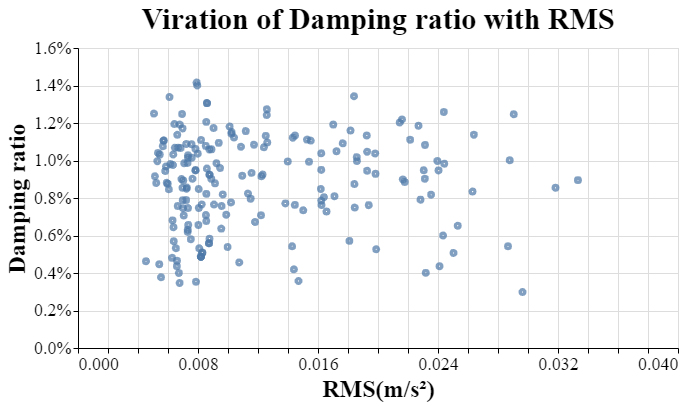

In [5]:
names = locals()
position = 1
with open(data_path+'Damping_position%d.pkl'%position, 'rb') as f:
    RMS_Damping = pickle.load(f)
RMS_Damping.columns = ['First mode', 'Second mode', 'Third mode']
RMS = acc.resample('%fT'%long_0).std()
RMS.columns = ['Position1','Position2','Position3','Position4','Position5']
RMS = RMS[start_time:end_time]['Position%d'%position]
RMS_Damping['RMS'] = RMS.values

# 作图
title_name = 'Viration of Damping ratio with RMS'
chart = (alt
         .Chart(RMS_Damping, title=title_name)
         .mark_point(strokeWidth=3.5, size=20, clip=True)
         .encode(alt.X('RMS:Q', title='RMS(m/s²)', axis=alt.Axis(domainColor='#000', tickColor='#000')),
                 alt.Y('First mode:Q', title='Damping ratio', axis=alt.Axis(domainColor='#000', tickColor='#000', format='%')))
         .configure_axis(grid=True, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=600)
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'

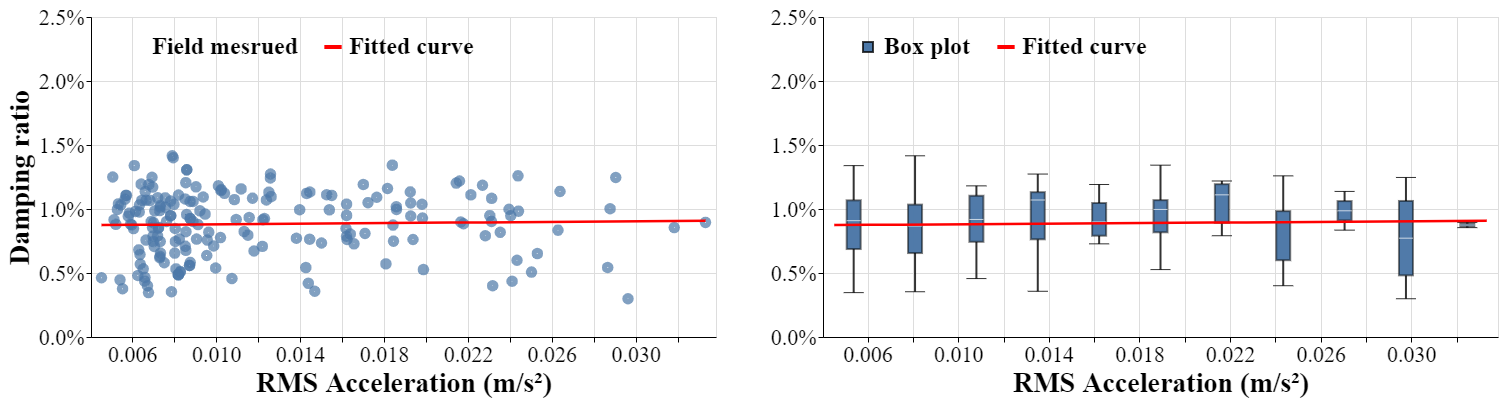

In [7]:
names = locals()
position = 1
with open(data_path+'Damping_position%d.pkl'%position, 'rb') as f:
    RMS_Damping = pickle.load(f)
RMS_Damping.columns = ['First mode', 'Second mode', 'Third mode']
RMS = acc.resample('%fT'%long_0).std()
RMS.columns = ['Position1','Position2','Position3','Position4','Position5']
RMS = RMS[start_time:end_time]['Position%d'%position]
RMS_Damping['RMS'] = RMS.values
Damping_mode = 'First mode'

# 拟合
n = 1 # 拟合次数
poly_data = pd.DataFrame({'RMS': np.linspace(RMS_Damping['RMS'].min(), RMS_Damping['RMS'].max(), 20)})
slope = np.polyfit(RMS_Damping['RMS'], RMS_Damping[Damping_mode], n)
poly_data[Damping_mode] = np.poly1d(slope)(poly_data['RMS'])
poly_data['legend'] = 'Fitted curve'
# print('RMS_Acceleration = %f RMS_Wind_%s² + %f RMS_Wind_%s + %f'%(slope[0],Damping_mode,slope[1],Damping_mode,slope[2]))

# 作图
title_name = 'Variation of RMS Acceleration with RMS Fluctuating Wind Speed (%s)' % (Damping_mode)
# 点图
Point = (alt
         .Chart(RMS_Damping, title='')
         .mark_point(strokeWidth=6, size=30, clip=True)
         .encode(alt.X('RMS:Q', axis=alt.Axis(domainColor='#000', tickColor='#000')),
                 alt.Y('%s:Q' % Damping_mode, title='Damping ratio', axis=alt.Axis(domainColor='#000', tickColor='#000', format='%')),
                 alt.Color('Position:N', legend=alt.Legend(symbolStrokeWidth=6, symbolSize=30, direction='horizontal', values=['Field mesrued'])))
         )
# 拟合曲线
poly_graph = (alt.Chart(poly_data)
              .mark_line(strokeWidth=2.5)
              .encode(alt.X('RMS:Q', title='RMS Acceleration (m/s²)',
                            scale=alt.Scale(zero=False, nice=False, domain=(RMS_Damping['RMS'].min()-0.0005, RMS_Damping['RMS'].max()+0.0005))),
                      alt.Y('%s:Q' % Damping_mode, scale=alt.Scale(domain=(0,0.025), zero=False, nice=False), 
                            axis=alt.Axis(domainColor='#000', tickColor='#000', tickMinStep=0.005, format='%')),
                      alt.Color('legend:N', scale=alt.Scale(range=('red','#4c77a8')), legend=alt.Legend(symbolStrokeWidth=4,symbolSize=300)))
             )
# Box-plot
groups = pd.cut(RMS_Damping['RMS'],11,precision=4)
RMS_Damping1 = RMS_Damping.copy()
RMS_Damping1['variety'] = groups.apply(lambda x: (x.left+x.right)/2)
RMS_Damping1['legend'] = 'Box plot'
Box_plot = (alt
            .Chart(RMS_Damping1)
            .mark_boxplot(ticks=alt.MarkConfig(size=20,opacity=0.8), # extent='min-max',
                          rule=alt.MarkConfig(strokeWidth=2,opacity=0.8),
                          box=alt.MarkConfig(fill='#4682b4',fillOpacity=0.98,stroke='black',strokeWidth=2,strokeOpacity=0.5),
                          outliers=alt.MarkConfig(color='#4682b4',filled=True,size=60))
            .encode(alt.X('variety:N', axis=None), alt.Y('%s:Q' % Damping_mode, title=' '), alt.Color('legend:N'))
           )
# 总图
chart = (((Point + poly_graph).properties(width=625,height=320).resolve_scale(color='independent', shape='independent')
          |(Box_plot + poly_graph).properties(width=675,height=320).resolve_scale(color='independent', shape='independent'))
         .configure_axis(titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_legend(title=None,labelFont='Times New Roman',labelFontSize=24, labelFontWeight='bold',
                           orient='top-left', rowPadding=15, labelLimit=400, symbolOffset=15)
         .resolve_scale(color='independent', shape='independent')
         #.configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## 绘制振幅-频率图

In [ ]:
names = locals()
position = 1
long_1 = 5 # 按分钟计，间隔长度
with open(data_path+'Frequency_position%d.pkl'%position, 'rb') as f:
    RMS_Frequency = pickle.load(f)
RMS_Frequency.columns = ['First mode', 'Second mode', 'Third mode']
RMS = pd.DataFrame(acc.mean(axis=1).resample('%fT'%long_1).std()[start_time:end_time], columns=['acc_RMS'])
RMS_Frequency['RMS'] = RMS.values

# 作图
title_name = 'Viration of Frequency with RMS'
chart = (alt
         .Chart(RMS_Frequency, title=title_name)
         .mark_point(strokeWidth=3.5, size=20, clip=True)
         .encode(alt.X('RMS:Q', title='RMS(m/s²)', axis=alt.Axis(domainColor='#000', tickColor='#000')),
                 alt.Y('First mode:Q', title='Frequency', scale=alt.Scale(zero=False), axis=alt.Axis(domainColor='#000', tickColor='#000')),
                 tooltip = RMS_Frequency.keys().tolist())
         .configure_axis(grid=True, titleFontSize=24, labelFontSize=18, labelFont='Times New Roman', titleFont='Times New Roman')
         .configure_title(font='Times New Roman', fontSize=30)
         .properties(width=600)
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'

In [ ]:
a=np.array([0.986547085202,0.988764044944,0.990990990991,0.993227990971,0.995475113122])
print(a[1:]-a[:-1])

a=np.array([1.09170305677,1.09409190372,1.09649122807,1.0989010989,1.1013215859,1.10375275938])
print(a[1:]-a[:-1])

a=np.array([1.27753303965,1.28035320088,1.28318584071,1.28479657388,1.28755364807,1.29032258065])
print(a[1:]-a[:-1])

# SSI_PP

In [ ]:
# 计算参数
position = '1&2&3&4&5' # 测点位置
time_stamp = pd.Timestamp('2011-08-06 13:20') # 数据起始点
long_0 = 5 # 按分钟计，用于计算的数据长度
long_1 = 5 # 按分钟计，间隔长度
Fs = 204.8 # 采样频率
filtering = [10,15] # 通带频率、阻带频率
draw = 1 # 是否绘图
PSDfangfa = 2 # 1为周期图法，2为多个周期图平均法
m = 4 # 平均周期图法的平分数
if_log = 0 # 是否对结果取对数
percent = 10 # 峰值下限取最高点的百分之几
minpeakdist = 0.08 # 峰值之间最小距离
Xrange = [0,10] # 绘图x轴范围

# matlab计算 传入多列数据
加速度 = pd.DataFrame()
for i in position.split('&'):
    加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验 # 转置是为了方便append而不是为了matlab，matlab里有校验
    
engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
[f_ssi,d_ssi,phi_ssi,f,ANPSD,locs,pks] = engine.SSI_PP_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                        'PP',1,
                                                        'filtering', matlab.double(filtering),
                                                        'draw', draw,
                                                        'PSDfangfa', float(PSDfangfa),
                                                        'm', float(m),
                                                        'if_log', float(if_log),
                                                        'draw', float(draw),
                                                        'percent', float(percent),
                                                        'minpeakdist', float(minpeakdist),
                                                        'Xrange', matlab.double(Xrange),
                                                        nargout=7)

# SSICOV

## 单张图

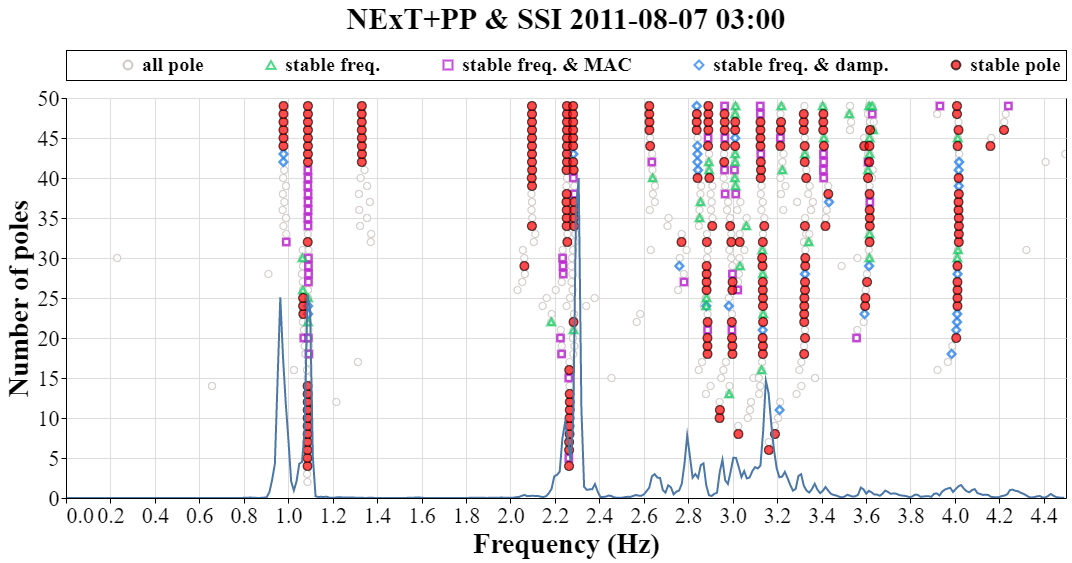

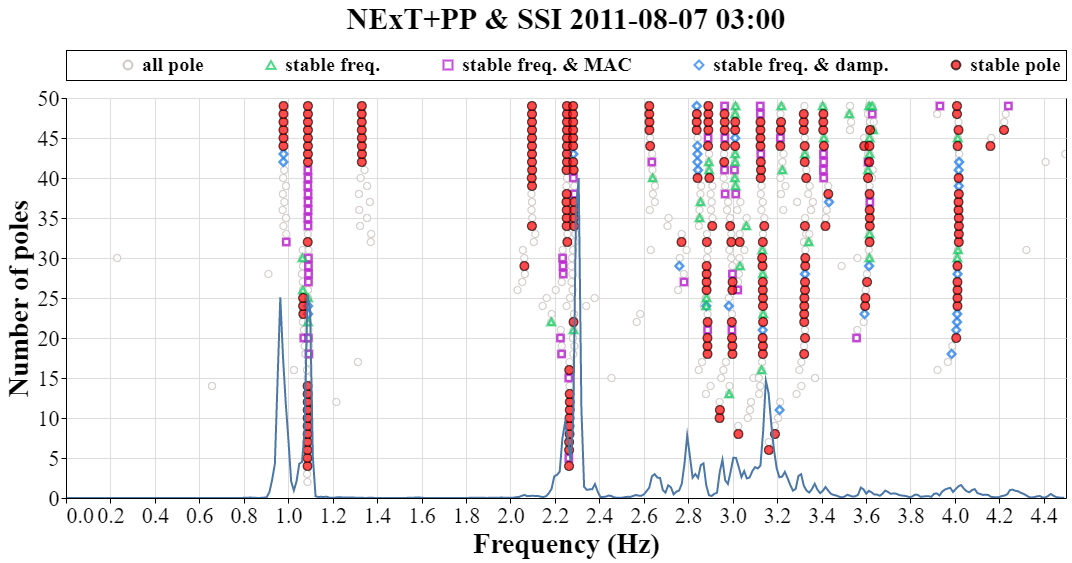

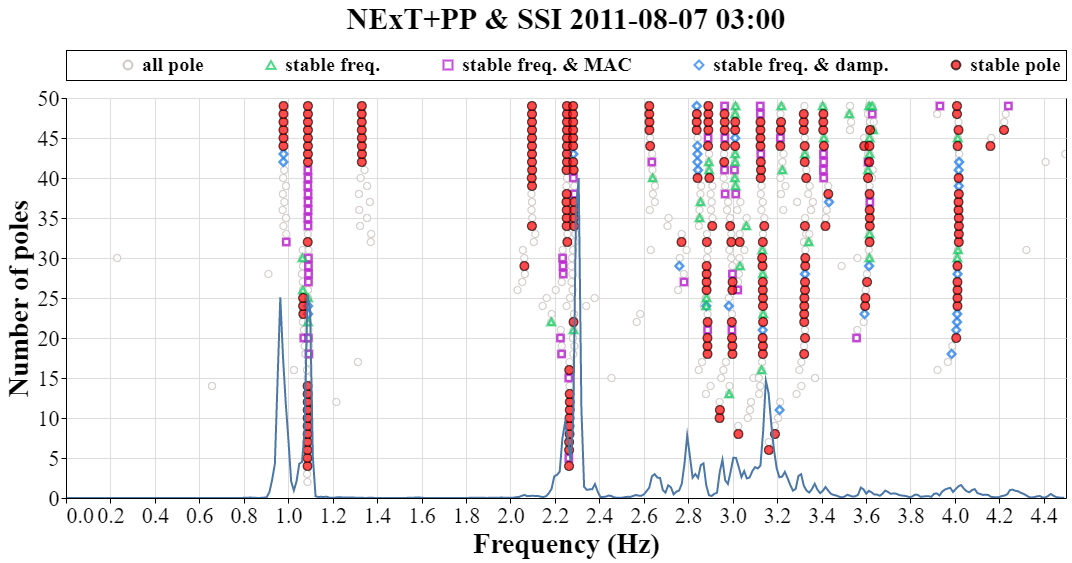

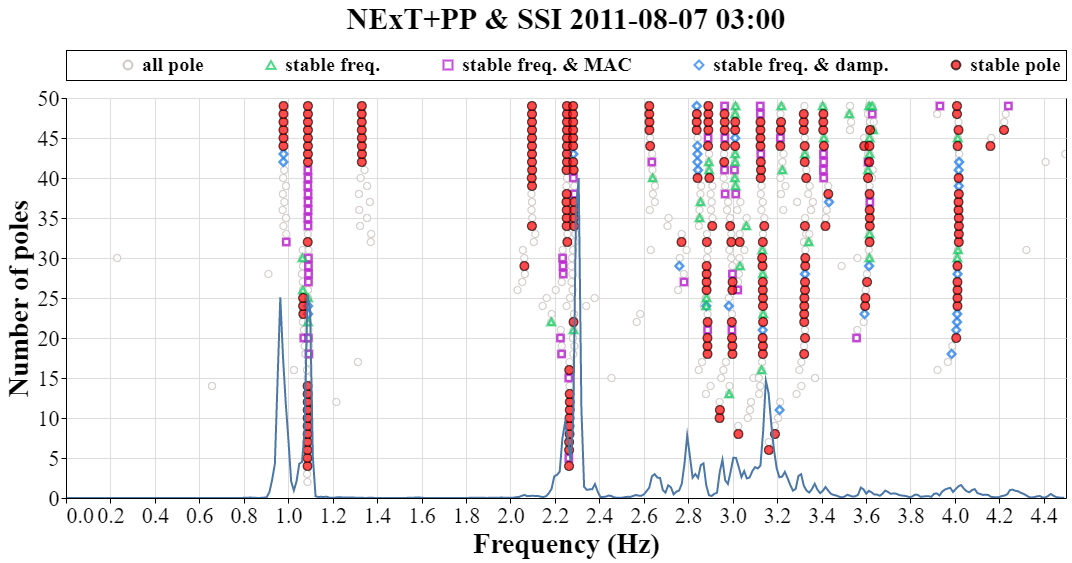

In [26]:
# 计算参数
position = '1&2&3&4&5' # 测点位置
# time_stamp = pd.Timestamp('2011-08-06 15:00') # 数据起始点
time_stamp = pd.Timestamp('2011-08-07 03:00') # 数据起始点
long_0 = 5 # 按分钟计，用于计算的数据长度
long_1 = 5 # 按分钟计，间隔长度
Ts = 10 # 按秒计 time lag for covariance calculation
Fs = 204.8 # 采样频率
new_f = 50 # 降采样频率（避免滤波时数据溢出），也可用于增采样
filtering = [10,15] # 通带频率、阻带频率
draw = 1 # 是否绘图
draw_matlab = 0 # 是否用matlab绘图
Xrange = [0,4.5] # 绘图x轴范围
if_log = 0 # 是否取对数
eps_freq = 1e-3 # 频率精度，非绝对值精读，而是相对精度
names = locals()

# matlab计算 传入多列数据
加速度 = pd.DataFrame()
for i in position.split('&'):
    加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验
    
engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
[fn,zeta,phi,plotdata] = engine.SSICOV_function_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                   'Ts', Ts, # 这个越长越精准，但速度会受影响
                                                   'new_f', float(new_f), # 降采样之后反而效果更好了，可能是因为所受的干扰信息少了
                                                   'methodCOV', 1, # 方法1精度更高
                                                   'Nmin', float(1), 'Nmax', float(50),
                                                   'filtering', matlab.double(filtering),
                                                   'draw', draw,
                                                   'draw_matlab', draw_matlab,
                                                   'Xrange', matlab.double(Xrange),
                                                   'if_log', if_log,
                                                   'eps_freq', eps_freq,
                                                    nargout=4)
# 出图说明
time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
title_name = 'NExT+PP & SSI ' + time_stamp_str
# stable pole : 频率、阵型、阻尼同时满足精度要求
# stable freq.& MAC : 频率、阵型满足精度要求
# stable freq.& damp.: 频率、阻尼满足精度要求
# stable freq.: 频率满足精度要求

all_pole = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][0])],[list(x)[0] for x in list(plotdata[1][0])]]).T
stable_pole = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][1])],[list(x)[0] for x in list(plotdata[1][1])]]).T
stable_freq_MAC = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][2])],[list(x)[0] for x in list(plotdata[1][2])]]).T
stable_freq_damp = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][3])],[list(x)[0] for x in list(plotdata[1][3])]]).T
stable_freq = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][4])],[list(x)[0] for x in list(plotdata[1][4])]]).T
all_pole['mark'] = 'all pole'; stable_pole['mark'] = 'stable pole'; stable_freq_MAC['mark'] = 'stable freq. & MAC'; stable_freq_damp['mark'] = 'stable freq. & damp.'; stable_freq['mark'] = 'stable freq.'
SSI_data = pd.concat([all_pole,stable_pole,stable_freq_MAC,stable_freq_damp,stable_freq], ignore_index =True); SSI_data.columns = ['frequency', 'mode', 'mark']
PP_data = pd.DataFrame([list(plotdata[2][0]), list(plotdata[3][0])]).T; PP_data.columns = ['frequency', 'mode']
SSI_data = SSI_data[SSI_data['frequency']<=Xrange[1]].drop_duplicates()
PP_data = PP_data[PP_data['frequency']<=Xrange[1]]

# 绘图参数
stroke = {'all pole':'#BAB0AC','stable freq.':'#00C853','stable freq. & MAC':'#B003CA','stable freq. & damp.':'#1679F0','stable pole':'black'}
fill = {'all pole':'white','stable freq.':'white','stable freq. & MAC':'white','stable freq. & damp.':'white','stable pole':'#FF0001'}
shape = {'all pole':'circle','stable freq.':'triangle-up','stable freq. & MAC':'square','stable freq. & damp.':'diamond','stable pole':'circle'}
size = {'all pole':50,'stable pole':80,'stable freq. & MAC':40,'stable freq. & damp.':60,'stable freq.':50}
strokeWidth = {'all pole':1,'stable pole':1,'stable freq. & MAC':2.5,'stable freq. & damp.':2.5,'stable freq.':2.5}
pole_types = {1:'all pole',2:'stable pole',3:'stable freq. & MAC',4:'stable freq. & damp.',5:'stable freq.'}

for i in range(1,6):
    pole_type = pole_types.get(i)
    names['SSI_chart%s'%i] = (alt
                 .Chart(SSI_data[SSI_data['mark']==pole_type], title=title_name)
                 .mark_point(clip=True, size=size.get(pole_type), strokeWidth=strokeWidth.get(pole_type))
                 .encode(alt.X('frequency:Q', scale=alt.Scale(domain=Xrange), title='Frequency (Hz)'),
                         alt.Y('mode:Q',  title='Number of poles'),
                         alt.Shape('mark:N', scale=alt.Scale(range=list(shape.values()))),
                         alt.Stroke('mark:N', scale=alt.Scale(range=list(stroke.values()))),
                         alt.Fill('mark:N', scale=alt.Scale(range=list(fill.values())))
                        )
                 )
PP_chart = (alt
            .Chart(PP_data)
            .mark_line(clip=True)
            .encode(alt.X('frequency:Q', scale=alt.Scale(domain=Xrange), title='Frequency (Hz)'),
                    alt.Y('mode:Q',  title='Number of poles'))
           )

SSI_PP_chart = ((SSI_chart1+SSI_chart3+SSI_chart4+SSI_chart5+SSI_chart2+PP_chart)
             .properties(width=1000, height=400)
             .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
             .configure_title(font='Times New Roman', fontSize=30, dy=-10)
             .configure_legend(title=None, labelFont='Times New Roman', labelFontSize=20, labelFontWeight='bold',
                           strokeColor='black', gradientDirection='horizontal', orient='top', padding=5, symbolOffset=47, titlePadding=0,
                           symbolStrokeWidth=2, symbolSize=80, rowPadding=15, labelLimit=400)
             .configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
             #.interactive(bind_y = False) # 交互性设置
            )
SSI_PP_chart.display()

## 组合图1

In [ ]:
# 所有参数在单张图里设置了，要先跑一下单张图
time_stamp1 = pd.Timestamp('2011-08-06 15:00')
time_stamp2 = pd.Timestamp('2011-08-07 03:00')

for ii in [1,2]: 
    time_stamp = names.get('time_stamp%d' % ii) # 数据起始点
    
    # matlab计算 传入多列数据
    加速度 = pd.DataFrame()
    for i in position.split('&'):
        加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验

    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [fn,zeta,phi,plotdata] = engine.SSICOV_function_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                       'Ts', Ts, # 这个越长越精准，但速度会受影响
                                                       'new_f', float(new_f), # 降采样之后反而效果更好了，可能是因为所受的干扰信息少了
                                                       'methodCOV', 1, # 方法1精度更高
                                                       'Nmin', float(1), 'Nmax', float(50),
                                                       'filtering', matlab.double(filtering),
                                                       'draw', draw,
                                                       'draw_matlab', draw_matlab,
                                                       'Xrange', matlab.double(Xrange),
                                                       'if_log', if_log,
                                                       'eps_freq', eps_freq,
                                                        nargout=4)
    # 出图说明
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    title_name = 'NExT+PP & SSI ' + time_stamp_str
    # stable pole : 频率、阵型、阻尼同时满足精度要求
    # stable freq.& MAC : 频率、阵型满足精度要求
    # stable freq.& damp.: 频率、阻尼满足精度要求
    # stable freq.: 频率满足精度要求

    all_pole = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][0])],[list(x)[0] for x in list(plotdata[1][0])]]).T
    stable_pole = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][1])],[list(x)[0] for x in list(plotdata[1][1])]]).T
    stable_freq_MAC = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][2])],[list(x)[0] for x in list(plotdata[1][2])]]).T
    stable_freq_damp = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][3])],[list(x)[0] for x in list(plotdata[1][3])]]).T
    stable_freq = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][4])],[list(x)[0] for x in list(plotdata[1][4])]]).T
    all_pole['mark'] = 'all pole'; stable_pole['mark'] = 'stable pole'; stable_freq_MAC['mark'] = 'stable freq. & MAC'; stable_freq_damp['mark'] = 'stable freq. & damp.'; stable_freq['mark'] = 'stable freq.'
    SSI_data = pd.concat([all_pole,stable_pole,stable_freq_MAC,stable_freq_damp,stable_freq], ignore_index =True); SSI_data.columns = ['frequency', 'mode', 'mark']
    PP_data = pd.DataFrame([list(plotdata[2][0]), list(plotdata[3][0])]).T; PP_data.columns = ['frequency', 'mode']
    SSI_data = SSI_data[SSI_data['frequency']<=Xrange[1]].drop_duplicates()
    PP_data = PP_data[PP_data['frequency']<=Xrange[1]]

    # 绘图参数
    stroke = {'all pole':'#BAB0AC','stable freq.':'#00C853','stable freq. & MAC':'#B003CA','stable freq. & damp.':'#1679F0','stable pole':'black'}
    fill = {'all pole':'white','stable freq.':'white','stable freq. & MAC':'white','stable freq. & damp.':'white','stable pole':'#FF0001'}
    shape = {'all pole':'circle','stable freq.':'triangle-up','stable freq. & MAC':'square','stable freq. & damp.':'diamond','stable pole':'circle'}
    size = {'all pole':50,'stable pole':80,'stable freq. & MAC':40,'stable freq. & damp.':60,'stable freq.':50}
    strokeWidth = {'all pole':1,'stable pole':1,'stable freq. & MAC':2.5,'stable freq. & damp.':2.5,'stable freq.':2.5}
    pole_types = {1:'all pole',2:'stable pole',3:'stable freq. & MAC',4:'stable freq. & damp.',5:'stable freq.'}

    for i in range(1,6):
        pole_type = pole_types.get(i)
        names['SSI_chart%s'%i] = (alt
                     .Chart(SSI_data[SSI_data['mark']==pole_type], title=title_name)
                     .mark_point(clip=True, size=size.get(pole_type), strokeWidth=strokeWidth.get(pole_type))
                     .encode(alt.X('frequency:Q', scale=alt.Scale(domain=Xrange), title='Frequency (Hz)'),
                             alt.Y('mode:Q',  title='Number of poles'),
                             alt.Shape('mark:N', scale=alt.Scale(range=list(shape.values()))),
                             alt.Stroke('mark:N', scale=alt.Scale(range=list(stroke.values()))),
                             alt.Fill('mark:N', scale=alt.Scale(range=list(fill.values())))
                            )
                     )
    PP_chart = (alt
                .Chart(PP_data)
                .mark_line(clip=True)
                .encode(alt.X('frequency:Q', scale=alt.Scale(domain=Xrange), title='Frequency (Hz)'),
                        alt.Y('mode:Q',  title='Number of poles'))
               )

    names['SSI_PP_chart%s'%ii] = ((SSI_chart1+SSI_chart3+SSI_chart4+SSI_chart5+SSI_chart2+PP_chart).properties(width=650, height=360))
    
SSI_PP_chart = ((SSI_PP_chart1 | SSI_PP_chart2)
                .resolve_scale(stroke='independent', shape='independent', fill='independent', opacity='independent')
                .configure_axis(grid=False, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
                .configure_title(font='Times New Roman', fontSize=30, dy=-10)
                .configure_legend(title=None, labelFont='Times New Roman', labelFontSize=16, labelFontWeight='bold',
                                  strokeColor='black', gradientDirection='horizontal', orient='top', padding=5, symbolOffset=4.5, titlePadding=0,
                                  symbolStrokeWidth=2, symbolSize=80, rowPadding=15, labelLimit=400)
                .configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
                #.interactive(bind_y = False) # 交互性设置
               )
SSI_PP_chart.display()

## 组合图2

In [ ]:
# 所有参数在单张图里设置了，要先跑一下单张图
time_stamp1 = pd.Timestamp('2011-08-06 15:00')
time_stamp2 = pd.Timestamp('2011-08-07 03:00')
Ts = 14 # 按秒计 time lag for covariance calculation
new_f = 100 # 降采样频率（避免滤波时数据溢出），也可用于增采样

for ii in [1,2]: 
    time_stamp = names.get('time_stamp%d' % ii) # 数据起始点
    
    # matlab计算 传入多列数据
    加速度 = pd.DataFrame()
    for i in position.split('&'):
        加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验

    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [fn,zeta,phi,plotdata] = engine.SSICOV_function_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                       'Ts', Ts, # 这个越长越精准，但速度会受影响
                                                       'new_f', float(new_f), # 降采样之后反而效果更好了，可能是因为所受的干扰信息少了
                                                       'methodCOV', 1, # 方法1精度更高
                                                       'Nmin', float(1), 'Nmax', float(50),
                                                       'filtering', matlab.double(filtering),
                                                       'draw', draw,
                                                       'draw_matlab', draw_matlab,
                                                       'Xrange', matlab.double(Xrange),
                                                       'if_log', if_log,
                                                       'eps_freq', eps_freq,
                                                        nargout=4)
    # 出图说明
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    title_name = 'NExT+PP & SSI ' + time_stamp_str
    # stable pole : 频率、阵型、阻尼同时满足精度要求
    # stable freq.& MAC : 频率、阵型满足精度要求
    # stable freq.& damp.: 频率、阻尼满足精度要求
    # stable freq.: 频率满足精度要求

    all_pole = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][0])],[list(x)[0] for x in list(plotdata[1][0])]]).T
    stable_pole = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][1])],[list(x)[0] for x in list(plotdata[1][1])]]).T
    stable_freq_MAC = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][2])],[list(x)[0] for x in list(plotdata[1][2])]]).T
    stable_freq_damp = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][3])],[list(x)[0] for x in list(plotdata[1][3])]]).T
    stable_freq = pd.DataFrame([[list(x)[0] for x in list(plotdata[0][4])],[list(x)[0] for x in list(plotdata[1][4])]]).T
    all_pole['mark'] = 'all poles'; stable_pole['mark'] = 'stable pole'; stable_freq_MAC['mark'] = 'stable freq. & MAC'; stable_freq_damp['mark'] = 'stable freq. & damp.'; stable_freq['mark'] = 'stable freq.'
    SSI_data = pd.concat([all_pole,stable_pole,stable_freq_MAC,stable_freq_damp,stable_freq], ignore_index =True); SSI_data.columns = ['frequency', 'mode', 'mark']
    PP_data = pd.DataFrame([list(plotdata[2][0]), list(plotdata[3][0])]).T; PP_data.columns = ['frequency', 'mode']
    SSI_data = SSI_data[SSI_data['frequency']<=Xrange[1]].drop_duplicates()
    PP_data = PP_data[PP_data['frequency']<=Xrange[1]]


    # 绘图参数
    stroke = {'all poles':'#BAB0AC','stable freq.':'#00C853','stable freq. & MAC':'#B003CA','stable freq. & damp.':'#1679F0','stable pole':'black'}
    fill = {'all poles':'white','stable freq.':'white','stable freq. & MAC':'white','stable freq. & damp.':'white','stable pole':'#FF0001'}
    shape = {'all poles':'circle','stable freq.':'triangle-up','stable freq. & MAC':'square','stable freq. & damp.':'diamond','stable pole':'circle'}
    size = {'all poles':50,'stable pole':80,'stable freq. & MAC':40,'stable freq. & damp.':60,'stable freq.':50}
    strokeWidth = {'all poles':1,'stable pole':1,'stable freq. & MAC':2.5,'stable freq. & damp.':2.5,'stable freq.':2.5}
    pole_types = {1:'all poles',2:'stable pole',3:'stable freq. & MAC',4:'stable freq. & damp.',5:'stable freq.'}

    for i in range(1,6):
        pole_type = pole_types.get(i)
        names['SSI_chart%s'%i] = (alt
                     .Chart(SSI_data[SSI_data['mark']==pole_type], title=title_name)
                     .mark_point(clip=True, size=size.get(pole_type), strokeWidth=strokeWidth.get(pole_type))
                     .encode(alt.X('frequency:Q', scale=alt.Scale(domain=Xrange), title='Frequency (Hz)'),
                             alt.Y('mode:Q',  title='Number of poles'),
                             alt.Shape('mark:N', scale=alt.Scale(range=list(shape.values()))),
                             alt.Stroke('mark:N', scale=alt.Scale(range=list(stroke.values()))),
                             alt.Fill('mark:N', scale=alt.Scale(range=list(fill.values())), legend=alt.Legend(title='Type:'))
                            )
                     )
    PP_chart = (alt
                .Chart(PP_data)
                .mark_line(clip=True)
                .encode(alt.X('frequency:Q', scale=alt.Scale(domain=Xrange), title='Frequency (Hz)'),
                        alt.Y('mode:Q',  title='Number of poles'))
               )

    names['SSI_PP_chart%s'%ii] = (SSI_chart1+SSI_chart3+SSI_chart4+SSI_chart5+SSI_chart2+PP_chart).properties(width=1300, height=350)

SSI_PP_chart = ((SSI_PP_chart1 & SSI_PP_chart2)
                .resolve_scale(stroke='independent', shape='independent', fill='independent', opacity='independent')
                .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
                .configure_title(font='Times New Roman', fontSize=30, dy=-2)
                .configure_legend(titleFont='Times New Roman', titleFontSize=22, titleFontWeight='bold', labelFont='Times New Roman', labelFontSize=22, labelFontWeight='bold', 
                           strokeColor='black', gradientDirection='horizontal', orient='none', legendY=-40, padding=6, symbolOffset=91, titlePadding=-23, 
                           symbolStrokeWidth=2, symbolSize=80, labelLimit=400)
                .configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
                #.interactive(bind_y = False) # 交互性设置
               )
SSI_PP_chart.display()

## 所有图

In [ ]:
# 所有参数在单张图里设置了，要先跑一下单张图
draw = 0 # 是否绘图，只有此时，才可以nargout=3
stabilization_diagram_df = pd.DataFrame([]) # 稳定图数据
start_time = pd.Timestamp('2011-08-06 13:00')

for time_stamp in pd.date_range(start_time,end_time,freq='%fT'%long_1):  # long_1表示取点间隔
    time_stamp_str = time_stamp.strftime('%Y-%m-%d %H:%M')
    print(time_stamp_str)
    # matlab计算
    加速度 = pd.DataFrame()
    for i in position.split('&'):
        加速度 = 加速度.append(acc[[int(i)-1]][time_stamp:time_stamp+pd.Timedelta('%fT'%long_0)].T) # 转置是为了方便append而不是为了matlab，matlab里有校验 #long_0表示取点长度
    engine.cd(r'E:\【论文】\【小论文】\模态识别\Matlab脚本\Method_Functions')
    [fn,zeta,phi,plotdata] = engine.SSICOV_function_py(matlab.double(np.array(加速度).tolist()), float(Fs),
                                                   'new_f', float(new_f),
                                                   'methodCOV', 1, # 方法1精度更高
                                                   'Nmin', float(1), 'Nmax', float(50),
                                                   'filtering', matlab.double(filtering),
                                                   'draw', draw,
                                                   'Xrange', matlab.double(Xrange),
                                                   'if_log', if_log,
                                                   'eps_freq', eps_freq,
                                                   'Ts', Ts,
                                                    nargout=4)
    # 作图预处理
    try:
        SSI = pd.DataFrame([]);
        try:
            SSI['fn'] = list(fn[0])
            SSI['zeta'] = list(zeta[0])
        except:
            SSI['fn'] = [fn]
            SSI['zeta'] = [zeta]
        SSI['mark'] = time_stamp_str
    except:
        continue

    # 循环中存稳定图数据
    stabilization_diagram_df = pd.concat([stabilization_diagram_df,SSI])
    
# dump稳定图数据
with open(data_path+'SSI 测点%s'%position + '稳定图数据-%d分钟-%d-%.1f.pkl'%(long_0,Ts,new_f), 'wb') as f:
    pickle.dump(stabilization_diagram_df, f)

# 微信通知运行完了
itchat.send('运行完啦', toUserName=friends.get('朱海涛'))

## 稳定图1

In [ ]:
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data0'):
    with open(pkl_path+'data0.pkl','rb') as f:
        data0 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')

## chart1: Mean Wind
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
chart1 = (alt.Chart(average_wind.reset_index(), title='')
         .mark_line(strokeWidth=2.5)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.X('uxy_mean:Q', title=' Mean (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=700)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart2: RMS luctuating Wind
fluctuating_wind = data0[['u']]
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time].u
RMS = RMS[start_time:end_time].reset_index().melt('index', var_name='wind_type', value_name='RMS')
# 作图
chart2 = (alt.Chart(RMS,title='')
         .mark_line(strokeWidth=2.5, clip=True)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format=('%0H:%0M'))),
                 alt.X('RMS:Q', title='RMS (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=700)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart3: stabilization_diagram
# 所有参数在单张图里设置了，要先跑一下单张图
with open(data_path+'SSI 测点%s'%position + '稳定图数据-%d分钟-%d-%.1f.pkl'%(long_0,Ts,new_f), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
title_name = 'Time Stability Diagram of Natural Frequencies'
stabilization_diagram_df.index = pd.DatetimeIndex(stabilization_diagram_df['mark'])
stabilization_diagram_df = stabilization_diagram_df[start_time:end_time]
chart3 = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_circle(strokeWidth=3.5, fillOpacity=0.9, size=60, clip=True)
         .encode(alt.X('fn:Q', title='Frequency (Hz)',scale=alt.Scale(domain=(0.5,4.6), nice=False)),
                 alt.Y('mark:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.Color('mark:N', legend=None, scale=alt.Scale(scheme=alt.SchemeParams('viridis', extent=[0.1,0.6]))
                          ))
         .properties(width=1000, height=700)
#          .interactive(bind_y = False) # 交互性设置
        )

## chart1 | chart2 | chart3
chart = ((alt.hconcat(chart1,chart2,title=alt.TitleParams('Wind Characteristics',dx=115,dy=35)) | chart3)
         .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         #.configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## 稳定图2

In [ ]:
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data0'):
    with open(pkl_path+'data0.pkl','rb') as f:
        data0 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')

## chart1: Mean Wind
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
chart1 = (alt.Chart(average_wind.reset_index(), title='')
         .mark_line(strokeWidth=2.5)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.X('uxy_mean:Q', title=' Mean (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=800)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart2: Mean_RMS luctuating Wind
fluctuating_wind = data0[['u']]
Mean_RMS = pd.DataFrame(fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time].u + average_wind.uxy_mean, columns=['Mean_RMS'])
Mean_RMS = Mean_RMS[start_time:end_time].reset_index().melt('index', var_name='wind_type', value_name='Mean_RMS')
# 作图
chart2 = (alt.Chart(Mean_RMS,title='')
         .mark_line(strokeWidth=2.5, clip=True)
         .encode(alt.Y('index:T', title=None, axis=alt.Axis(format=('%0H:%0M'))),
                 alt.X('Mean_RMS:Q', title='Mean+RMS (m/s)', scale=alt.Scale(zero=False)))
         .properties(width=150, height=800)
         #.interactive(bind_x = False) # 交互性设置
        )

## chart3: stabilization_diagram
# 所有参数在单张图里设置了，要先跑一下单张图
with open(data_path+'SSI 测点%s'%position + '稳定图数据-%d分钟-%d-%.1f.pkl'%(long_0,Ts,new_f), 'rb') as f:
    stabilization_diagram_df = pickle.load(f)
title_name = 'Time Stability Diagram of Natural Frequencies'
stabilization_diagram_df.index = pd.DatetimeIndex(stabilization_diagram_df['mark'])
stabilization_diagram_df = stabilization_diagram_df[start_time:end_time]
mark2 = [0]; temp = 0
for ii in range(len(stabilization_diagram_df.mark)):
    if ii == len(stabilization_diagram_df.mark)-1:
        temp += 1
        mark2.append(temp)
    elif stabilization_diagram_df.mark[ii]==stabilization_diagram_df.mark[ii+1]:
        temp += 1
        mark2.append(temp)
    else:
        temp += 1
        mark2.append(temp)
        temp = 0
stabilization_diagram_df['mark2']  = mark2[1:]
chart3 = (alt
         .Chart(stabilization_diagram_df, title=title_name)
         .mark_circle(strokeWidth=3.5, fillOpacity=1, size=60, clip=True)
         .encode(alt.X('fn:Q', title='Frequency (Hz)', scale=alt.Scale(domain=(0.5,4), nice=False)),
                 alt.Y('mark:T', title=None, axis=alt.Axis(format='%0H:%0M')),
                 alt.Color('mark2:N', legend=alt.Legend(title='Order', values=[str(x) for x in range(1,23)])))
         .properties(width=1000, height=800)
         # .interactive(bind_y = False) # 交互性设置
        )

## chart1 | chart2 | chart3
chart = ((alt.hconcat(chart1,chart2,title=alt.TitleParams('Wind Characteristics',dx=115,dy=35)) | chart3)
         .configure_axis(grid=True, titleFontSize=28, labelFontSize=22, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=30)
         .configure_legend(titleFont='Times New Roman', titleFontSize=20, titleFontWeight='bold', 
                           labelFont='Times New Roman', labelFontSize=20, labelFontWeight='bold', titlePadding=20, #symbolOffset=50,
                           symbolStrokeWidth=4, symbolSize=200, rowPadding=15, labelLimit=400)
         # .configure_view(stroke='#000') # 黑色外边框，需设置grid=False才能看到
        )
chart.display()
picture_path1 = picture_path0 + title_name + '.png'
# chart.save(picture_path1, scale_factor=10)

## 频率与风速关系

In [ ]:
def frequency_with_wind(wind, title0):
    # 跑一遍稳定图，再跑这个
    frequencies=[]; Std = []; correlation_coefficient = []
    Frequency_domain = [[0.95,1.02],[1.075,1.13],[1.26,1.321],[2,2.2],[2.2,2.4]]
    Frequency_dict = {0:'First-order Frequency', 1:'Second-order Frequency', 2:'Third-order Frequency', 3:'Fourth-order Frequency', 4:'Fifth-order Frequency'}
    try:
        wind = wind.drop(index=pd.Timestamp('2011-08-07 01:10'))
        wind = wind.drop(index=pd.Timestamp('2011-08-07 01:25'))
        wind = wind.drop(index=pd.Timestamp('2011-08-07 02:05'))
        wind = wind.drop(index=pd.Timestamp('2011-08-07 04:30'))
    except:
        pass
    
    for ii in range(len(Frequency_domain)):
        names['Frequency%d'%ii] = stabilization_diagram_df[(stabilization_diagram_df.fn>Frequency_domain[ii][0])&(stabilization_diagram_df.fn<Frequency_domain[ii][1])][['fn']]
        # 避免在筛选某一阶时出现同一个时刻出现多阶
        names['Frequency%d'%ii] = names['Frequency%d'%ii].loc[names['Frequency%d'%ii].index.drop_duplicates(keep=False),:]
        names['Wind_Frequency%d'%ii] = pd.concat([wind,names['Frequency%d'%ii]],axis=1,join='inner')
        
        # 拟合
        n = 1 # 拟合次数
        poly_data = pd.DataFrame({'%s'%wind.keys()[0]: np.linspace(names['Wind_Frequency%d'%ii]['%s'%wind.keys()[0]].min(), names['Wind_Frequency%d'%ii]['%s'%wind.keys()[0]].max(), 20)})
        slope = np.polyfit(names['Wind_Frequency%d'%ii]['%s'%wind.keys()[0]], names['Wind_Frequency%d'%ii]['fn'], n)
        poly_data['fn'] = np.poly1d(slope)(poly_data['%s'%wind.keys()[0]])

        names['chart%d'%ii] = ((alt # 散点
                                .Chart(names.get('Wind_Frequency%d'%ii), title=Frequency_dict.get(ii))
                                .mark_circle(strokeWidth=5, size=100, clip=False)
                                .encode(alt.X('%s'%wind.keys()[0], title=title0, scale=alt.Scale(zero=False)),
                                        alt.Y('fn', title='Frequency (Hz)', 
                                              scale=alt.Scale(nice=False, domain=(
                                                  names['Wind_Frequency%d'%ii].fn.min()-0.1, 
                                                  names['Wind_Frequency%d'%ii].fn.max()+0.1))
                                             ),
                                        tooltip = names['Wind_Frequency%d'%ii].keys().tolist())
                               ) + 
                               (alt # 拟合直线
                                .Chart(poly_data)
                                .mark_line(strokeWidth=2.5, clip=False)
                                .encode(alt.X('%s'%wind.keys()[0], title=title0, scale=alt.Scale(zero=False)),
                                        alt.Y('fn', title='Frequency (Hz)'),
                                        alt.Color('legend:N', scale=alt.Scale(range=('red','#4c77a8')), legend=None))
                               )).properties(height=350, width=400)
        
        print('f = %.3f %s + %.3f'%(slope[0], '%s'%wind.keys()[0], slope[1]))
        frequencies.append(round(names['Frequency%d'%ii].fn.mean(),4))
        Std.append(round((names['Frequency%d'%ii]['fn'].std()),4))
        correlation_coefficient.append(round(names['Wind_Frequency%d'%ii][wind.keys()[0]].corr(names.get('Wind_Frequency%d'%ii)['fn']),4))
    print('频率为:%s'%frequencies)    
    print('Std.为:%sHz'%Std)
    print('相关系数为:%s'%correlation_coefficient)

    chart = ((chart0 | chart1 | chart2 | chart3 | chart4)
             .configure_axis(grid=True, titleFontSize=38, labelFontSize=30, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
             .configure_title(font='Times New Roman', fontSize=45)
            )
    chart.display()

print('***************************************************************************************************************************************************************************')
print('与加速度RMS关系：')
acc_RMS = pd.DataFrame(acc.mean(axis=1).resample('%fT'%long_1).std()[start_time:end_time], columns=['acc_RMS'])
frequency_with_wind(acc_RMS, 'RMS Acceleration (m/s²)')

print('***************************************************************************************************************************************************************************')
print('与平均风速关系：')
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
frequency_with_wind(average_wind, 'Mean Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与最大风速关系：')
max_wind = data0[['uxy']].resample('%fT'%long_1).max()[start_time:end_time]
frequency_with_wind(max_wind, 'Max Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
frequency_with_wind(RMS, 'RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Mean+RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
Mean_plus_RMS = pd.DataFrame(RMS.u+average_wind.uxy_mean,columns=['Mean_RMS'])
frequency_with_wind(Mean_plus_RMS, 'Mean + RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Gust Factor关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
gust_factor_u = data1['gust_factor'][['gust_factor_u']][start_time:end_time]
frequency_with_wind(gust_factor_u, 'Gust Factor')

print('***************************************************************************************************************************************************************************')
print('与Turbulence Intensity关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
turbulence_intensity_u = data1['turbulence_intensity'][['turbulence_intensity_u']][start_time:end_time]
frequency_with_wind(turbulence_intensity_u, 'Turbulence Intensity_u')

## 阻尼与风速关系

In [ ]:
def Damping_with_wind(wind, title0):
    # 跑一遍稳定图，再跑这个
    Dampings = []; Std = []; correlation_coefficient = []
    Frequency_domain = [[0.95,1.02],[1.075,1.13],[1.26,1.321],[2,2.2],[2.2,2.4]]
    Damping_dict = {0:'First-order Damping', 1:'Second-order Damping', 2:'Third-order Damping', 3:'Fourth-order Damping', 4:'Fifth-order Damping'}
    try:
        wind = wind.drop(index=pd.Timestamp('2011-08-07 01:10'))
        wind = wind.drop(index=pd.Timestamp('2011-08-07 01:25'))
        wind = wind.drop(index=pd.Timestamp('2011-08-07 02:05'))
        wind = wind.drop(index=pd.Timestamp('2011-08-07 04:30'))
    except:
        pass

    for ii in range(len(Frequency_domain)):
        names['Damping%d'%ii] = stabilization_diagram_df[(stabilization_diagram_df.fn>Frequency_domain[ii][0])&(stabilization_diagram_df.fn<Frequency_domain[ii][1])][['zeta']]
        # 避免在筛选某一阶时出现同一个时刻出现多阶
        names['Damping%d'%ii] = names['Damping%d'%ii].loc[names['Damping%d'%ii].index.drop_duplicates(keep=False),:]
        names['Wind_Damping%d'%ii] = pd.concat([wind,names['Damping%d'%ii]],axis=1,join='inner')
        
        # 拟合
        n = 1 # 拟合次数
        poly_data = pd.DataFrame({'%s'%wind.keys()[0]: np.linspace(names['Wind_Damping%d'%ii]['%s'%wind.keys()[0]].min(), names['Wind_Damping%d'%ii]['%s'%wind.keys()[0]].max(), 20)})
        slope = np.polyfit(names['Wind_Damping%d'%ii]['%s'%wind.keys()[0]], names['Wind_Damping%d'%ii]['zeta'], n)
        poly_data['zeta'] = np.poly1d(slope)(poly_data['%s'%wind.keys()[0]])

        names['chart%d'%ii] = ((alt # 散点
                                .Chart(names.get('Wind_Damping%d'%ii), title=Damping_dict.get(ii))
                                .mark_circle(strokeWidth=5, size=100, clip=False)
                                .encode(alt.X('%s'%wind.keys()[0], title=title0, scale=alt.Scale(zero=False)),
                                        alt.Y('zeta', title='Damping Ratio', 
                                              scale=alt.Scale(nice=False, domain=(
                                                  names['Wind_Damping%d'%ii].zeta.min()-0.1, 
                                                  names['Wind_Damping%d'%ii].zeta.max()+0.1))
                                             ),
                                        tooltip = names['Wind_Damping%d'%ii].keys().tolist())
                               ) + 
                               (alt # 拟合直线
                                .Chart(poly_data)
                                .mark_line(strokeWidth=2.5, clip=False)
                                .encode(alt.X('%s'%wind.keys()[0], title=title0, scale=alt.Scale(zero=False)),
                                        alt.Y('zeta', title='Damping Ratio'),
                                        alt.Color('legend:N', scale=alt.Scale(range=('red','#4c77a8')), legend=None))
                               )).properties(height=350, width=400)
        
        Dampings.append('%.3f%%'%(100*names['Damping%d'%ii].zeta.mean()))
        Std.append('%.3f%%'%(100*names['Damping%d'%ii]['zeta'].std()))
        correlation_coefficient.append(round(names['Wind_Damping%d'%ii][wind.keys()[0]].corr(names.get('Wind_Damping%d'%ii)['zeta']),4))
    print('各阶阻尼为:%s'%Dampings)    
    print('Std.为:%s'%Std)
    print('相关系数为:%s'%correlation_coefficient)

    chart = ((chart0 | chart1 | chart2 | chart3 | chart4)
             .configure_axis(grid=True, titleFontSize=38, labelFontSize=30, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
             .configure_title(font='Times New Roman', fontSize=45)
            )
    chart.display()

print('***************************************************************************************************************************************************************************')
print('与加速度RMS关系：')
acc_RMS = pd.DataFrame(acc.mean(axis=1).resample('%fT'%long_1).std()[start_time:end_time], columns=['acc_RMS'])
Damping_with_wind(acc_RMS, 'RMS Acceleration (m/s²)')

print('***************************************************************************************************************************************************************************')
print('与平均风速关系：')
average_wind = data0[['uxy_mean']].resample('%fT'%long_1).mean()[start_time:end_time]
Damping_with_wind(average_wind, 'Mean Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与最大风速关系：')
max_wind = data0[['uxy']].resample('%fT'%long_1).max()[start_time:end_time]
Damping_with_wind(max_wind, 'Max Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
Damping_with_wind(RMS, 'RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Mean+RMS脉动风速关系：')
RMS = fluctuating_wind.resample('%fT'%long_1).std()[start_time:end_time]
Mean_plus_RMS = pd.DataFrame(RMS.u+average_wind.uxy_mean,columns=['Mean_RMS'])
Damping_with_wind(Mean_plus_RMS, 'Mean + RMS Wind Speed (m/s)')

print('***************************************************************************************************************************************************************************')
print('与Gust Factor关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
gust_factor_u = data1['gust_factor'][['gust_factor_u']][start_time:end_time]
Damping_with_wind(gust_factor_u, 'Gust Factor')

print('***************************************************************************************************************************************************************************')
print('与Turbulence Intensity关系：')
## 加载风数据
pkl_path = 'E:/【论文】/【小论文】/航博/航博数据/Wind/Wind(East)(AMD)/' # pkl保存位置
if not if_var_exists('data1'):
    with open(pkl_path+'data1.pkl','rb') as f:
        data1 = pickle.load(f)
start_time = pd.Timestamp('2011-08-06 13:00'); end_time = pd.Timestamp('2011-08-07 05:00')
turbulence_intensity_u = data1['turbulence_intensity'][['turbulence_intensity_u']][start_time:end_time]
Damping_with_wind(turbulence_intensity_u, 'Turbulence Intensity_u')

## 频率与阻尼关系

In [ ]:
# 跑一遍稳定图，再跑这个
Dampings = []; Std_Damping = []; Frequencies = []; Std_Frequency = []; correlation_coefficient = []
Frequency_domain = [[0.95,1.02],[1.075,1.13],[1.26,1.321],[2,2.2],[2.2,2.4]]
Damping_dict = {0:'First-order Damping', 1:'Second-order Damping', 2:'Third-order Damping', 3:'Fourth-order Damping', 4:'Fifth-order Damping'}
try:
    stabilization_diagram_df = stabilization_diagram_df.drop(index=pd.Timestamp('2011-08-07 01:10'))
    stabilization_diagram_df = stabilization_diagram_df.drop(index=pd.Timestamp('2011-08-07 01:25'))
    stabilization_diagram_df = stabilization_diagram_df.drop(index=pd.Timestamp('2011-08-07 02:05'))
    stabilization_diagram_df = stabilization_diagram_df.drop(index=pd.Timestamp('2011-08-07 04:30'))
except:
    pass

for ii in range(len(Frequency_domain)):
    names['Frequency_Damping%d'%ii] = stabilization_diagram_df[(stabilization_diagram_df.fn>Frequency_domain[ii][0])&(stabilization_diagram_df.fn<Frequency_domain[ii][1])][['fn','zeta']]
    # 避免在筛选某一阶时出现同一个时刻出现多阶
    names['Frequency_Damping%d'%ii] = names['Frequency_Damping%d'%ii].loc[names['Frequency_Damping%d'%ii].index.drop_duplicates(keep=False),:]

    # 拟合
    n = 1 # 拟合次数
    poly_data = pd.DataFrame({'zeta': np.linspace(names['Frequency_Damping%d'%ii]['zeta'].min(), names['Frequency_Damping%d'%ii]['zeta'].max(), 20)})
    slope = np.polyfit(names['Frequency_Damping%d'%ii]['zeta'], names['Frequency_Damping%d'%ii]['fn'], n)
    poly_data['fn'] = np.poly1d(slope)(poly_data['zeta'])

    names['chart%d'%ii] = ((alt # 散点
                            .Chart(names.get('Frequency_Damping%d'%ii), title=Damping_dict.get(ii))
                            .mark_circle(strokeWidth=5, size=100, clip=False)
                            .encode(alt.X('zeta:Q', title='Damping Ratio', scale=alt.Scale(zero=False)),
                                    alt.Y('fn:Q', title='Frequency', 
                                          scale=alt.Scale(nice=False, domain=(
                                              names['Frequency_Damping%d'%ii].fn.min()-0.1, 
                                              names['Frequency_Damping%d'%ii].fn.max()+0.1))
                                         ),
                                    tooltip = names['Frequency_Damping%d'%ii].keys().tolist())
                           ) + 
                           (alt # 拟合直线
                            .Chart(poly_data)
                            .mark_line(strokeWidth=2.5, clip=False)
                            .encode(alt.X('zeta:Q', title='Damping Ratio', scale=alt.Scale(zero=False)),
                                    alt.Y('fn:Q', title='Frequency', scale=alt.Scale(zero=False)),
                                    alt.Color('legend:N', scale=alt.Scale(range=('red','#4c77a8')), legend=None))
                           )).properties(height=350, width=400)

    Dampings.append('%.3f%%'%(100*names['Frequency_Damping%d'%ii].zeta.mean()))
    Std_Damping.append('%.3f%%'%(100*names['Frequency_Damping%d'%ii]['zeta'].std()))
    Frequencies.append('%.3f%%'%(100*names['Frequency_Damping%d'%ii].fn.mean()))
    Std_Frequency.append('%.3f%%'%(100*names['Frequency_Damping%d'%ii]['fn'].std()))
    correlation_coefficient.append(round(names['Frequency_Damping%d'%ii]['fn'].corr(names['Frequency_Damping%d'%ii]['zeta']),4))
print('各阶阻尼为:%s'%Dampings)    
print('阻尼Std.为:%s'%Std_Damping)
print('各阶频率为:%s'%Dampings)    
print('频率Std.为:%s'%Std_Damping)
print('相关系数为:%s'%correlation_coefficient)

chart = ((chart0 | chart1 | chart2 | chart3 | chart4)
         .configure_axis(grid=True, titleFontSize=38, labelFontSize=30, labelFont='Times New Roman', titleFont='Times New Roman', domainColor='#000', tickColor='#000')
         .configure_title(font='Times New Roman', fontSize=45)
        )
chart.display()